In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [4]:
cumulative_player_stats_df = Local.get_cumulative_player_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [5]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [6]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [7]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [8]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [9]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [10]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [11]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [12]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [13]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  APG_total_home  RPG_total_home  \
0                0.000000           0.000000        0.000000        0.000000   
1                0.000000           0.000000        0.000000        0.000000   
2                0.000000           0.000000        0.000000        0.000000   
3                0.000000           0.000000        0.000000        0.000000   
4                0.000000           0.000000        0.000000        0.000000   
...                   ...                ...             ...             ...   
23515            0.353000           0.691000       25.000000       41.500000   
23516            0.383000           0.619000       26.000000       35.500000   
23517            0.329333           0.704667       30.666667       52.666667   
23518            0.321500           0.704500       22.000000       44.500000   
23519            0.305333           0.758000       25.000000       51.333333   

       PPG_total_away  FG_PCT_total_away  FG3_PCT_total_away  \
0            0.000000           0.000000            0.000000   
1            0.000000           0.000000            0.000000   
2            0.000000           0.000000            0.000000   
3            0.000000           0.000000            0.000000   
4            0.000000           0.000000            0.000000   
...               ...                ...                 ...   
23515       92.000000           0.427000            0.283000   
23516      108.000000           0.471000            0.241000   
23517      111.333333           0.392667            0.332333   
23518       93.333333           0.413333            0.333000   
23519      110.666667           0.442333            0.372333   

       FT_PCT_total_away  APG_total_away  RPG_total_away  TEAM_ID_away  \
0               0.000000        0.000000        0.000000  1.610613e+09   
1               0.000000        0.000000        0.000000  1.610613e+09   
2               0.000000        0.000000        0.000000  1.610613e+09   
3               0.000000        0.000000        0.000000  1.610613e+09   
4               0.000000        0.000000        0.000000  1.610613e+09   
...                  ...             ...             ...           ...   
23515           0.818000       26.000000       35.000000  1.610613e+09   
23516           0.750000       23.000000       42.000000  1.610613e+09   
23517  

## Add PCA of Player Stats column

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
cumulative_stats_df.insert(len(cumulative_stats_df.columns), 'PLAYER_RANKING_home', np.nan)
cumulative_stats_df.insert(len(cumulative_stats_df.columns), 'PLAYER_RANKING_away', np.nan)

In [16]:
for i, row in cumulative_stats_df.iterrows():
    home_team_player_stats = cumulative_player_stats_df[
        (cumulative_player_stats_df['GAME_ID']==row['GAME_ID'])&
        (cumulative_player_stats_df['TEAM_ID']==row['TEAM_ID_home'])&
        (cumulative_player_stats_df['GAMES_PLAYED']>0)
    ][['PPG_total','FG_PCT_total','FG3_PCT_total','SPG_total','APG_total','FT_PCT_total','BPG_total','RPG_total']].dropna()
    away_team_player_stats = cumulative_player_stats_df[
        (cumulative_player_stats_df['GAME_ID']==row['GAME_ID'])&
        (cumulative_player_stats_df['TEAM_ID']==row['TEAM_ID_away'])&
        (cumulative_player_stats_df['GAMES_PLAYED']>0)
    ][['PPG_total','FG_PCT_total','FG3_PCT_total','SPG_total','APG_total','FT_PCT_total','BPG_total','RPG_total']].dropna()
    if len(home_team_player_stats)>0:
        pca_1 = PCA(n_components=1)
        reduced_home_team_player_stats = pd.DataFrame(pca_1.fit_transform(home_team_player_stats))
        cumulative_stats_df['PLAYER_RANKING_home'].iat[i] = reduced_home_team_player_stats.mean()
    if len(away_team_player_stats)>0:
        pca_1 = PCA(n_components=1)
        reduced_away_team_player_stats = pd.DataFrame(pca_1.fit_transform(away_team_player_stats))
        cumulative_stats_df['PLAYER_RANKING_away'].iat[i] = reduced_away_team_player_stats.mean()
    if i%5000==0:
        print(i)

0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:468: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:468: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


5000
10000
15000
20000


In [17]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  APG_total_home  RPG_total_home  \
0                0.000000           0.000000        0.000000        0.000000   
1                0.000000           0.000000        0.000000        0.000000   
2                0.000000           0.000000        0.000000        0.000000   
3                0.000000           0.000000        0.000000        0.000000   
4                0.000000           0.000000        0.000000        0.000000   
...                   ...                ...             ...             ...   
23515            0.353000           0.691000       25.000000       41.500000   
23516            0.383000           0.619000       26.000000       35.500000   
23517            0.329333           0.704667       30.666667       52.666667   
23518            0.321500           0.704500       22.000000       44.500000   
23519            0.305333           0.758000       25.000000       51.333333   

       PPG_total_away  FG_PCT_total_away  FG3_PCT_total_away  \
0            0.000000           0.000000            0.000000   
1            0.000000           0.000000            0.000000   
2            0.000000           0.000000            0.000000   
3            0.000000           0.000000            0.000000   
4            0.000000           0.000000            0.000000   
...               ...                ...                 ...   
23515       92.000000           0.427000            0.283000   
23516      108.000000           0.471000            0.241000   
23517      111.333333           0.392667            0.332333   
23518       93.333333           0.413333            0.333000   
23519      110.666667           0.442333            0.372333   

       FT_PCT_total_away  APG_total_away  RPG_total_away  TEAM_ID_away  \
0               0.000000        0.000000        0.000000  1.610613e+09   
1               0.000000        0.000000        0.000000  1.610613e+09   
2               0.000000        0.000000        0.000000  1.610613e+09   
3               0.000000        0.000000        0.000000  1.610613e+09   
4               0.000000        0.000000        0.000000  1.610613e+09   
...                  ...             ...             ...           ...   
23515           0.818000       26.000000       35.000000  1.610613e+09   
23516           0.750000       23.000000       42.000000  1.610613e+09   
23517  

## Attach target columns to dataset

In [18]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
cumulative_stats_copy_df['home_win'] = winners_df
cumulative_stats_copy_df['greater_fgp'] = greater_fgp_df
cumulative_stats_copy_df['greater_fg3'] = greater_fg3_df
cumulative_stats_copy_df['greater_ft'] = greater_ft_df
cumulative_stats_copy_df['greater_ast'] = greater_ast_df
cumulative_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [19]:
cumulative_stats_copy_df = cumulative_stats_copy_df[(cumulative_stats_copy_df['GAMES_PLAYED_home']>0) & (cumulative_stats_copy_df['GAMES_PLAYED_away']>0)].dropna()

# Get new target datasets after row removal
winners_df = cumulative_stats_copy_df['home_win']
greater_fgp_df = cumulative_stats_copy_df['greater_fgp']
greater_fg3_df = cumulative_stats_copy_df['greater_fg3']
greater_ft_df = cumulative_stats_copy_df['greater_ft']
greater_ast_df = cumulative_stats_copy_df['greater_ast']
greater_reb_df = cumulative_stats_copy_df['greater_reb']

## Remove non-data

In [20]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

PPG_total_home  FG_PCT_total_home  FG3_PCT_total_home  \
114         79.000000           0.329000            0.143000   
117        100.000000           0.442000            0.365000   
118         90.000000           0.457000            0.143000   
119        105.000000           0.527000            0.700000   
120         76.000000           0.383000            0.200000   
...               ...                ...                 ...   
23515      111.500000           0.443500            0.353000   
23516      105.000000           0.438000            0.383000   
23517      119.333333           0.466667            0.329333   
23518      100.000000           0.415000            0.321500   
23519      112.666667           0.444333            0.305333   

       FT_PCT_total_home  APG_total_home  RPG_total_home  PPG_total_away  \
114             0.897000        7.000000       44.000000       86.000000   
117             0.650000       20.500000       38.500000       62.000000   
118             0.735000       23.000000       41.000000      104.000000   
119             0.714000       27.000000       39.000000       80.000000   
120             0.750000       17.000000       39.000000      101.000000   
...                  ...             ...             ...             ...   
23515           0.691000       25.000000       41.500000       92.000000   
23516           0.619000       26.000000       35.500000      108.000000   
23517           0.704667       30.666667       52.666667      111.333333   
23518           0.704500       22.000000       44.500000       93.333333   
23519           0.758000       25.000000       51.333333      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
114             0.352000            0.222000           0.647000   
117             0.385000            0.300000           0.576000   
118             0.527000            0.429000           0.657000   
119             0.350000            0.429000           0.750000   
120             0.464000            0.250000           0.679000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  W_PCT_away  W_PCT_home  \
114         15.000000       55.000000    1.000000    0.000000   
117         11.000000       30.000000    1.000000    0.500000   
118         22.000000       33.000000    1.000000    1.000000   
119         18.000000       45.000000    0.000000    1.000000   
120         22.000000       47.000000    1.000000    1.000000   
...               ...             ...         ...         ...   
23515       26.000000       35.000000    0.000000    1.000000   
23516       23.000000       42.000000    1.000000    0.000000   
23517       24.000000       56.000000    0.333333    1.000000   
23518       20.000000       41.666667    0.666667    0.000000   
23519       29.666667       45.000000    0.333333    0.333333   

       PLAYER_RANKING_home  PLAYER_RANKING_away  
114           2.664535e-16         7.894919e-16  
117           2.467162e-17         1.776357e-16  
118           0.000000e+00         7.401487e-16  
119           3.947460e-16        -3.947460e-16  
120          -8.074349e-17        -8.881784e-17  
...                    ...                  ...  
23515         6.908054e-16         4.743680e-16  
23516        -6.106227e-16        -1.110223e-16  
23517         1.268826e-16        -8.141636e-16  
23518        -1.480297e-16         4.440892e-16  
23519        -9.083643e-16         8.074349e-17  

[23085 rows x 16 columns]

## Do hyperparameters searches

In [21]:
from sklearn.metrics import classification_report

In [22]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [23]:
from sklearn.utils.class_weight import compute_sample_weight

In [24]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [25]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [26]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best Random Forest accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [27]:
from imblearn.combine import SMOTEENN

In [28]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(cumulative_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [29]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            RandomForestClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train Random Forest Without Pruning

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       880
           1       0.75      0.32      0.45       494

    accuracy                           0.72      1374
   macro avg       0.73      0.63      0.63      1374
weighted avg       0.73      0.72      0.68      1374



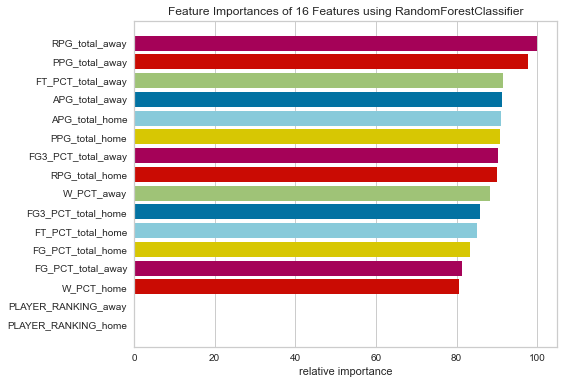

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       856
           1       0.73      0.32      0.45       518

    accuracy                           0.70      1374
   macro avg       0.71      0.62      0.62      1374
weighted avg       0.71      0.70      0.66      1374



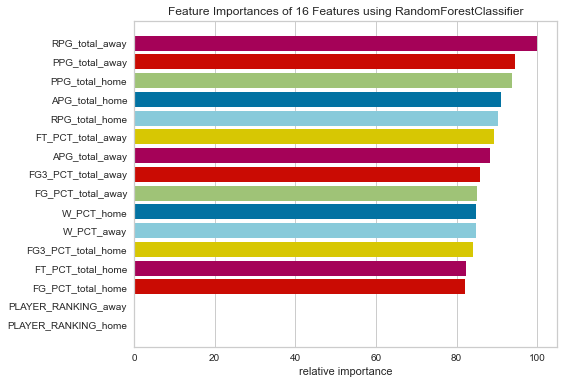

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       862
           1       0.75      0.35      0.48       512

    accuracy                           0.71      1374
   macro avg       0.73      0.64      0.64      1374
weighted avg       0.72      0.71      0.68      1374



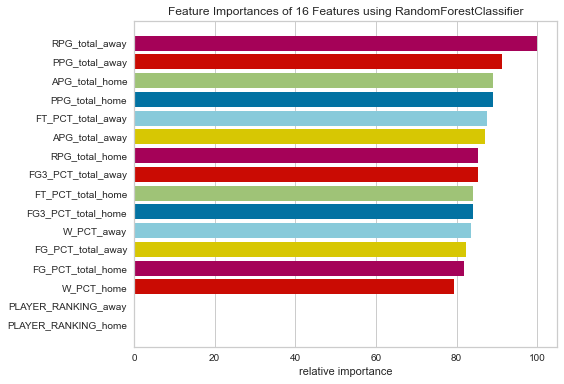

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.72
              precision    recall  f1-score   support

           0       0.72      0.92      0.80       867
           1       0.72      0.38      0.49       506

    accuracy                           0.72      1373
   macro avg       0.72      0.65      0.65      1373
weighted avg       0.72      0.72      0.69      1373



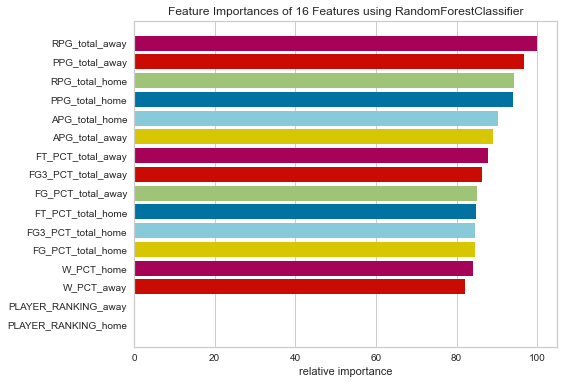

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       873
           1       0.72      0.35      0.47       500

    accuracy                           0.71      1373
   macro avg       0.71      0.64      0.64      1373
weighted avg       0.71      0.71      0.68      1373



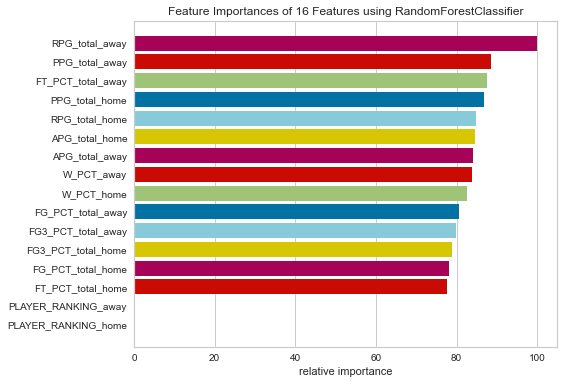

---------------------------------------------
Mean accuracy: 0.7119207930868878
Max accuracy: 0.7176128093158661
Min accuracy: 0.6986899563318777
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       589
           1       0.76      0.41      0.53       408

    accuracy                           0.71       997
   macro avg       0.73      0.66      0.66       997
weighted avg       0.72      0.71      0.68       997



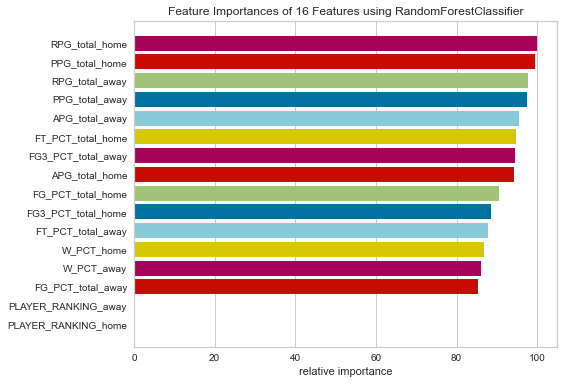

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       629
           1       0.65      0.42      0.51       368

    accuracy                           0.70       997
   macro avg       0.68      0.64      0.65       997
weighted avg       0.69      0.70      0.68       997



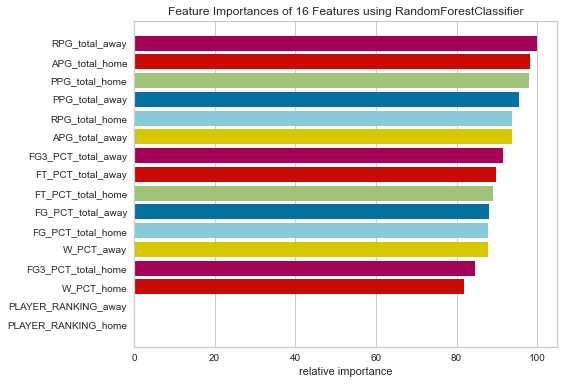

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       579
           1       0.74      0.36      0.48       418

    accuracy                           0.68       997
   macro avg       0.70      0.63      0.62       997
weighted avg       0.69      0.68      0.65       997



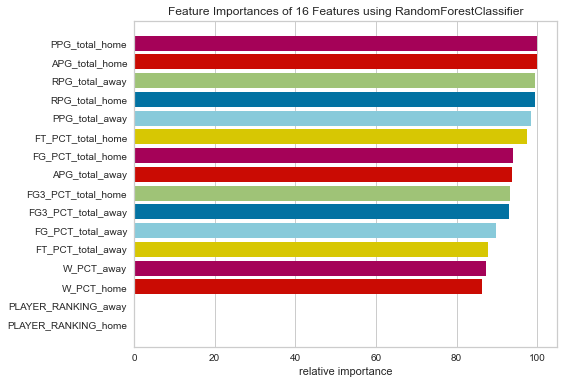

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       631
           1       0.66      0.38      0.48       366

    accuracy                           0.70       997
   macro avg       0.69      0.63      0.63       997
weighted avg       0.69      0.70      0.68       997



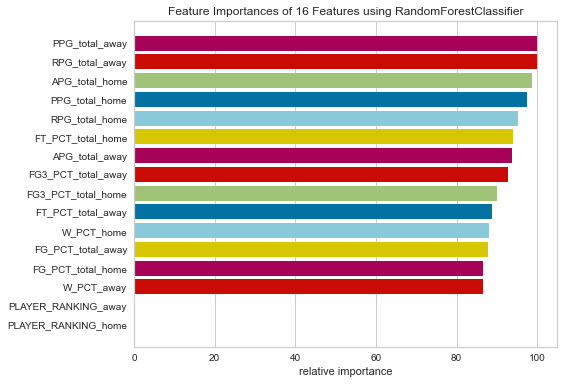

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       579
           1       0.75      0.39      0.51       417

    accuracy                           0.69       996
   macro avg       0.71      0.65      0.64       996
weighted avg       0.71      0.69      0.66       996



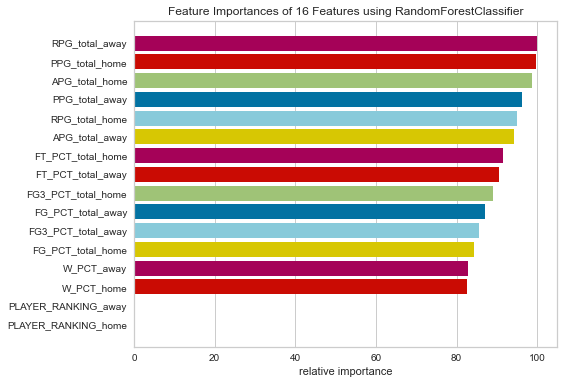

---------------------------------------------
Mean accuracy: 0.6960882647943831
Max accuracy: 0.7061183550651956
Min accuracy: 0.6770310932798396
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       314
           1       0.66      0.52      0.58       313

    accuracy                           0.63       627
   macro avg       0.63      0.63      0.62       627
weighted avg       0.63      0.63      0.62       627



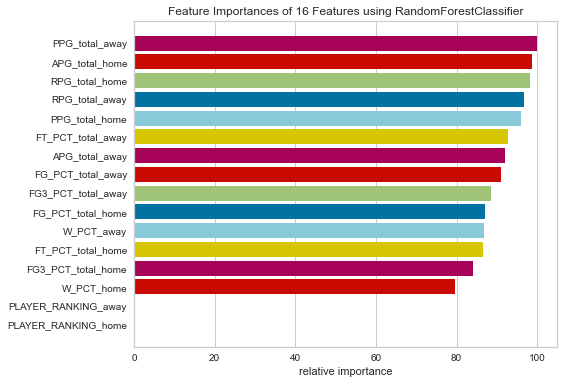

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       332
           1       0.65      0.58      0.61       295

    accuracy                           0.65       627
   macro avg       0.65      0.65      0.65       627
weighted avg       0.65      0.65      0.65       627



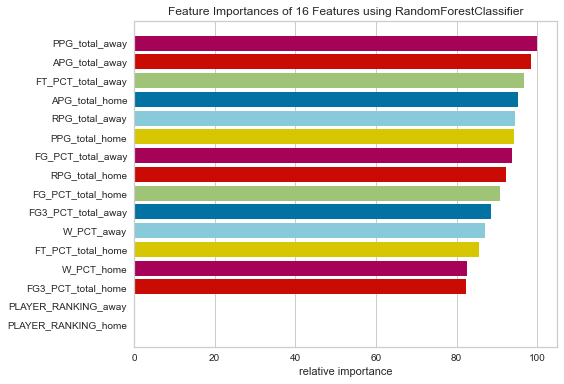

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       347
           1       0.64      0.60      0.62       280

    accuracy                           0.67       627
   macro avg       0.67      0.66      0.66       627
weighted avg       0.67      0.67      0.67       627



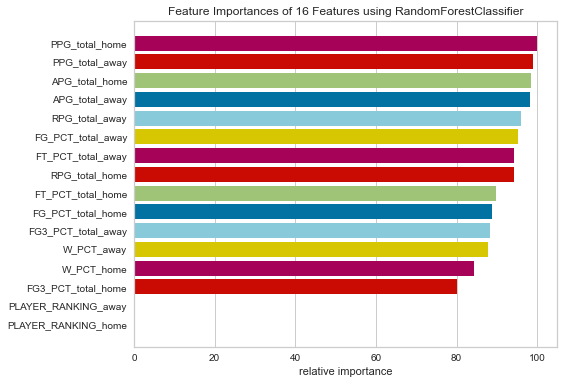

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       324
           1       0.64      0.52      0.58       302

    accuracy                           0.63       626
   macro avg       0.63      0.62      0.62       626
weighted avg       0.63      0.63      0.62       626



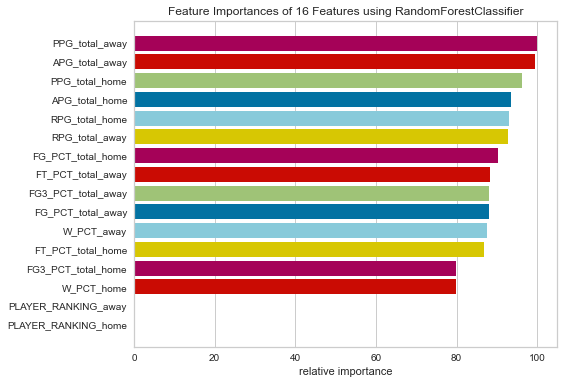

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       328
           1       0.65      0.52      0.58       298

    accuracy                           0.64       626
   macro avg       0.64      0.63      0.63       626
weighted avg       0.64      0.64      0.63       626



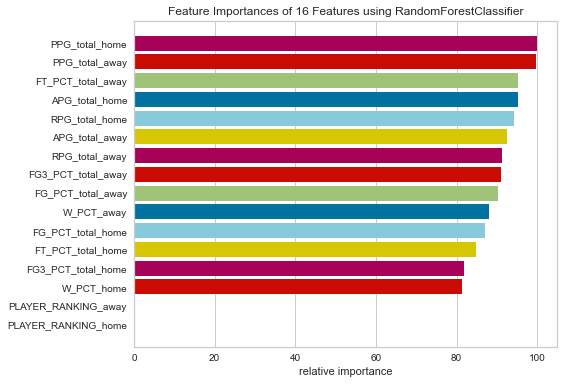

---------------------------------------------
Mean accuracy: 0.6445884352181644
Max accuracy: 0.6698564593301436
Min accuracy: 0.6277955271565495
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       309
           1       0.64      0.67      0.66       328

    accuracy                           0.64       637
   macro avg       0.64      0.64      0.64       637
weighted avg       0.64      0.64      0.64       637



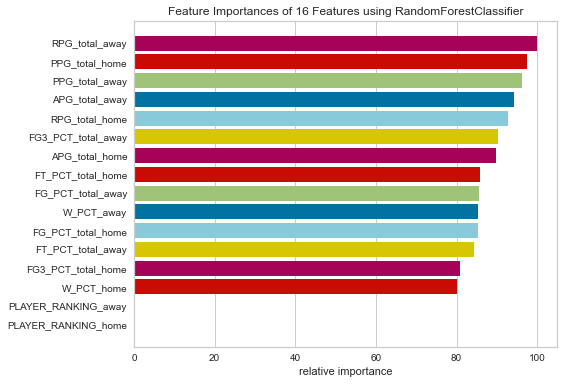

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       297
           1       0.67      0.67      0.67       340

    accuracy                           0.65       637
   macro avg       0.65      0.65      0.65       637
weighted avg       0.65      0.65      0.65       637



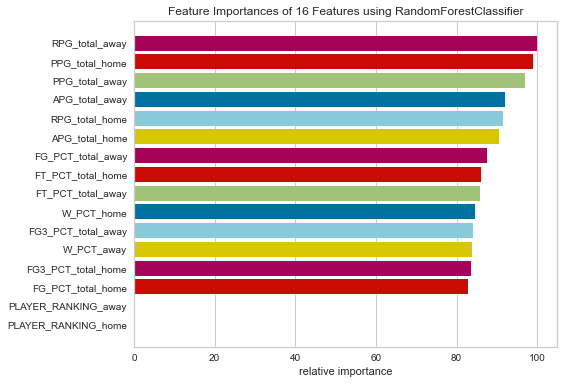

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       329
           1       0.60      0.71      0.65       308

    accuracy                           0.63       637
   macro avg       0.64      0.64      0.63       637
weighted avg       0.64      0.63      0.63       637



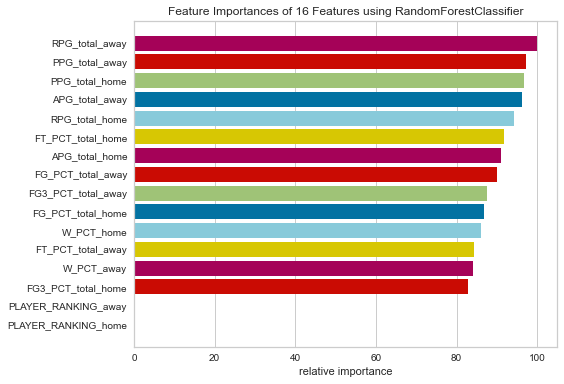

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       299
           1       0.64      0.58      0.61       337

    accuracy                           0.61       636
   macro avg       0.61      0.61      0.61       636
weighted avg       0.61      0.61      0.61       636



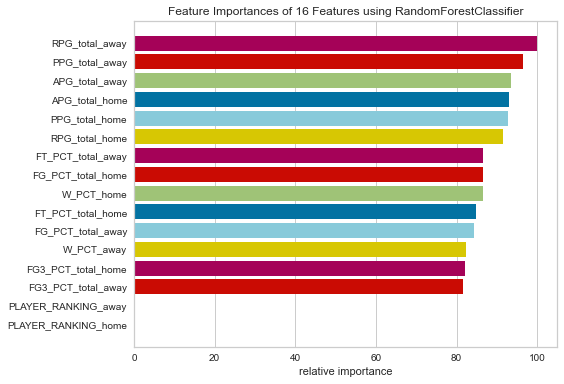

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       313
           1       0.64      0.67      0.66       323

    accuracy                           0.64       636
   macro avg       0.64      0.64      0.64       636
weighted avg       0.64      0.64      0.64       636



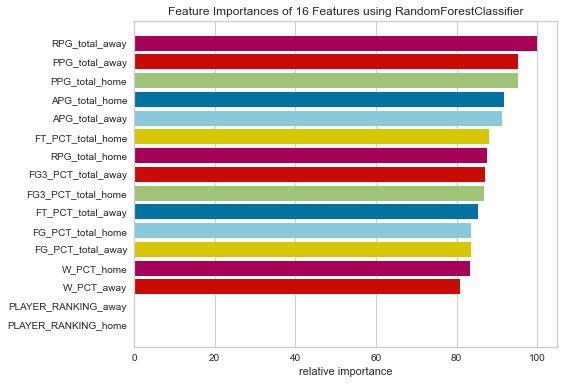

---------------------------------------------
Mean accuracy: 0.6317138611613005
Max accuracy: 0.6483516483516484
Min accuracy: 0.6069182389937107
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.89      0.77       565
           1       0.73      0.42      0.54       397

    accuracy                           0.70       962
   macro avg       0.71      0.66      0.65       962
weighted avg       0.70      0.70      0.68       962



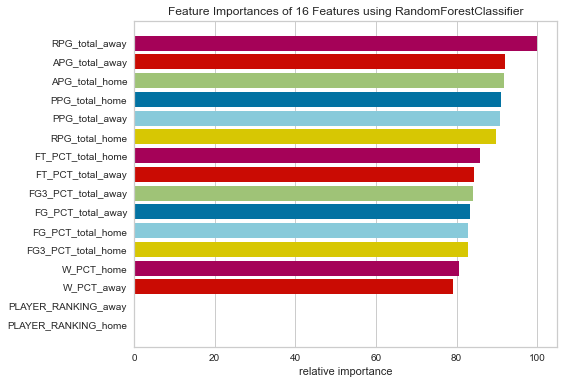

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       561
           1       0.70      0.44      0.54       401

    accuracy                           0.69       962
   macro avg       0.69      0.66      0.65       962
weighted avg       0.69      0.69      0.67       962



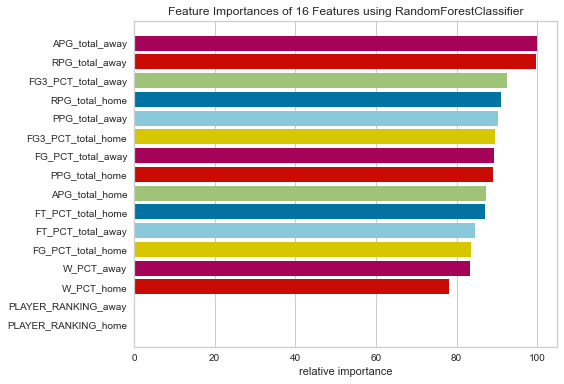

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       552
           1       0.72      0.41      0.53       409

    accuracy                           0.68       961
   macro avg       0.70      0.65      0.64       961
weighted avg       0.69      0.68      0.66       961



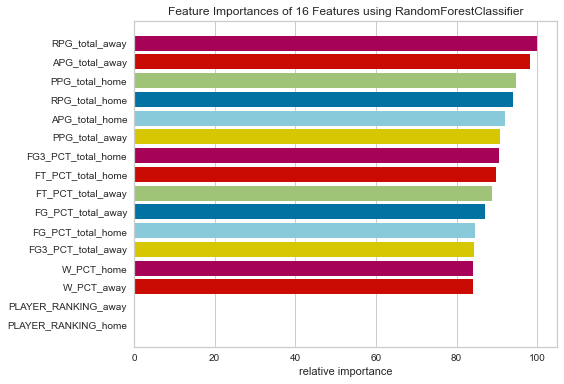

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       585
           1       0.65      0.44      0.52       376

    accuracy                           0.69       961
   macro avg       0.67      0.64      0.64       961
weighted avg       0.68      0.69      0.67       961



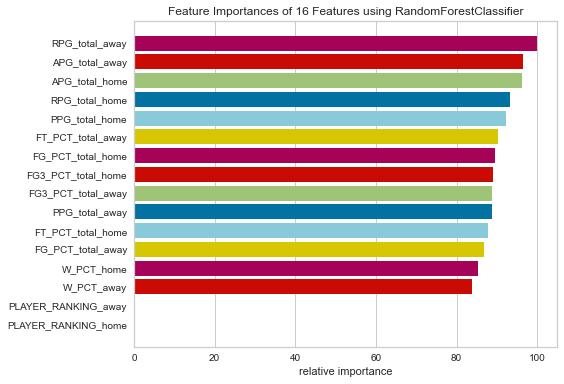

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       544
           1       0.72      0.42      0.53       417

    accuracy                           0.68       961
   macro avg       0.69      0.65      0.65       961
weighted avg       0.69      0.68      0.66       961



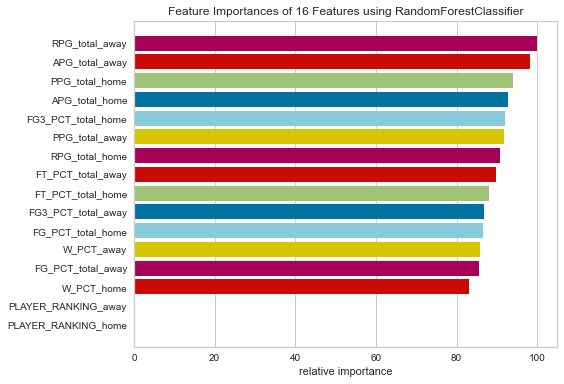

---------------------------------------------
Mean accuracy: 0.6887651679535134
Max accuracy: 0.6964656964656964
Min accuracy: 0.6826222684703434
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       482
           1       0.67      0.43      0.53       352

    accuracy                           0.67       834
   macro avg       0.67      0.64      0.64       834
weighted avg       0.67      0.67      0.65       834



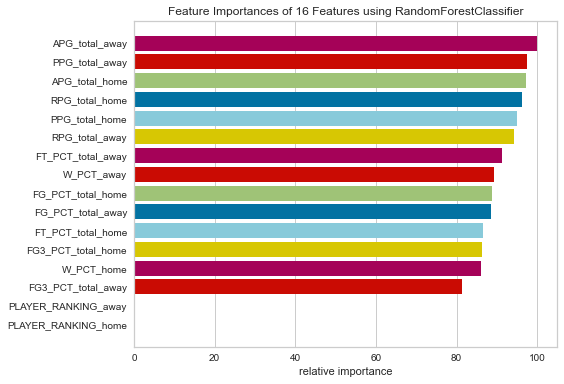

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       472
           1       0.68      0.43      0.53       362

    accuracy                           0.66       834
   macro avg       0.67      0.64      0.63       834
weighted avg       0.67      0.66      0.65       834



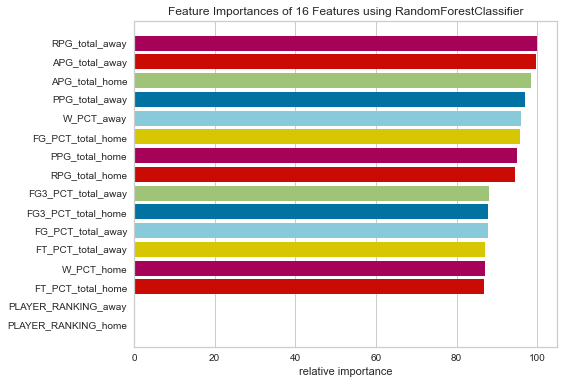

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       473
           1       0.70      0.45      0.55       361

    accuracy                           0.68       834
   macro avg       0.69      0.65      0.65       834
weighted avg       0.69      0.68      0.67       834



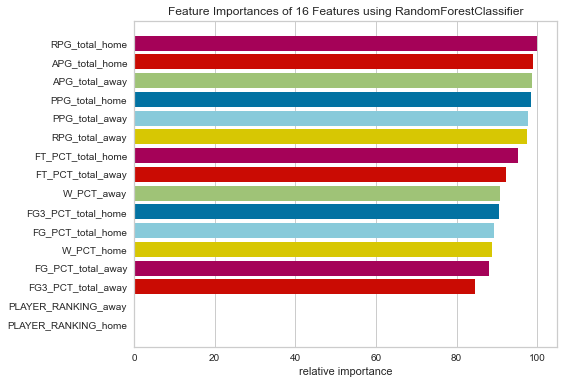

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       509
           1       0.61      0.49      0.54       325

    accuracy                           0.68       834
   macro avg       0.66      0.65      0.65       834
weighted avg       0.67      0.68      0.67       834



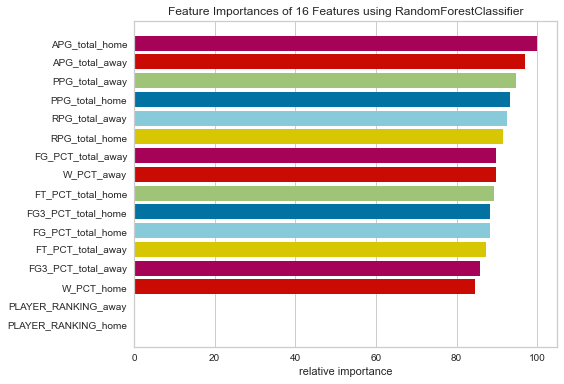

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       458
           1       0.71      0.47      0.56       375

    accuracy                           0.68       833
   macro avg       0.69      0.66      0.65       833
weighted avg       0.68      0.68      0.66       833



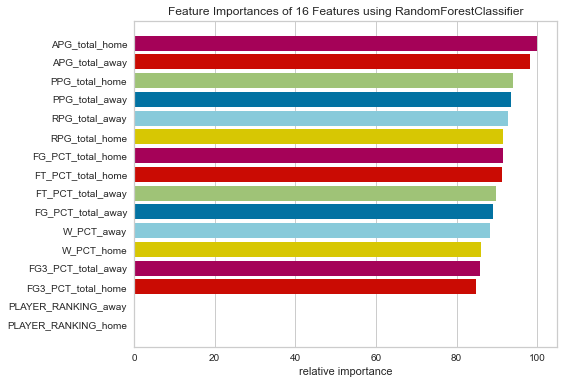

---------------------------------------------
Mean accuracy: 0.6744604316546763
Max accuracy: 0.6810551558752997
Min accuracy: 0.6642685851318945


In [30]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

## Try pruning max depth

i=0
WINNER:

Best Random Forest accuracy ({'max_depth': 272, 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       880
           1       0.75      0.32      0.45       494

    accuracy                           0.72      1374
   macro avg       0.73      0.63      0.63      1374
weighted avg       0.73      0.72      0.68      1374



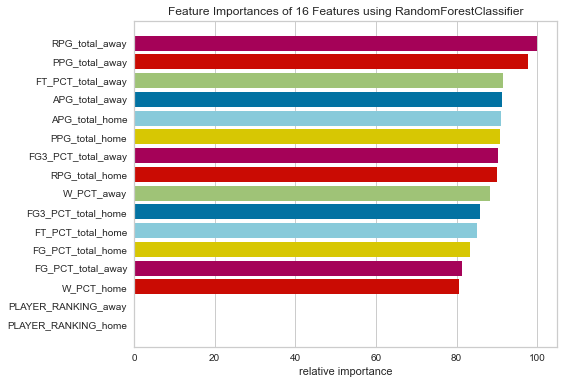

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_depth': 902, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       856
           1       0.73      0.32      0.45       518

    accuracy                           0.70      1374
   macro avg       0.71      0.62      0.62      1374
weighted avg       0.71      0.70      0.66      1374



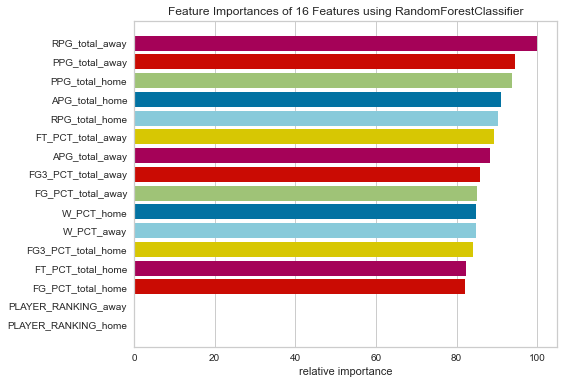

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_depth': 715, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       862
           1       0.75      0.35      0.48       512

    accuracy                           0.71      1374
   macro avg       0.73      0.64      0.64      1374
weighted avg       0.72      0.71      0.68      1374



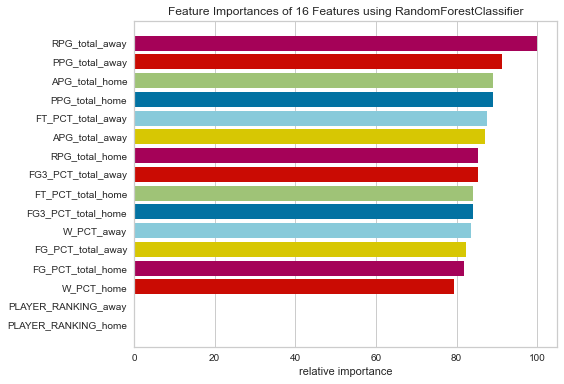

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_depth': 948, 'criterion': 'entropy'}): 0.72
              precision    recall  f1-score   support

           0       0.72      0.92      0.80       867
           1       0.72      0.38      0.49       506

    accuracy                           0.72      1373
   macro avg       0.72      0.65      0.65      1373
weighted avg       0.72      0.72      0.69      1373



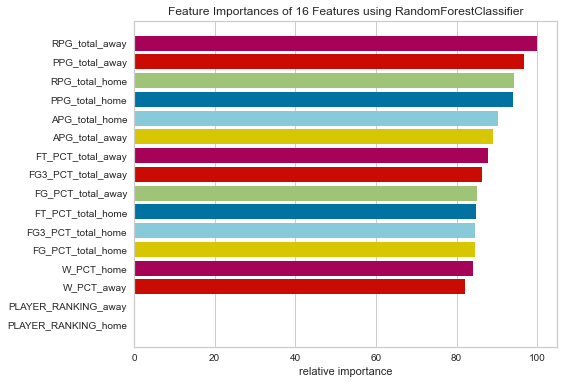

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_depth': 29, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       873
           1       0.73      0.32      0.44       500

    accuracy                           0.71      1373
   macro avg       0.72      0.63      0.62      1373
weighted avg       0.72      0.71      0.67      1373



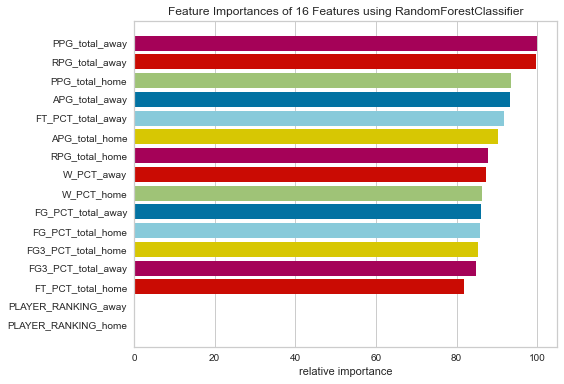

---------------------------------------------
Mean accuracy: 0.7119207930868878
Max accuracy: 0.7176128093158661
Min accuracy: 0.6986899563318777
i=5
FGP:

Best Random Forest accuracy ({'max_depth': 739, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       589
           1       0.76      0.41      0.53       408

    accuracy                           0.71       997
   macro avg       0.73      0.66      0.66       997
weighted avg       0.72      0.71      0.68       997



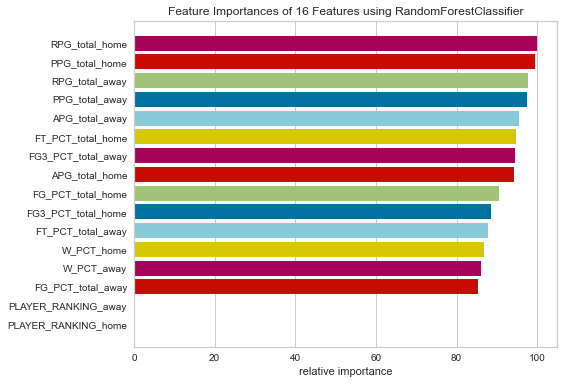

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_depth': 784, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       629
           1       0.65      0.42      0.51       368

    accuracy                           0.70       997
   macro avg       0.68      0.64      0.65       997
weighted avg       0.69      0.70      0.68       997



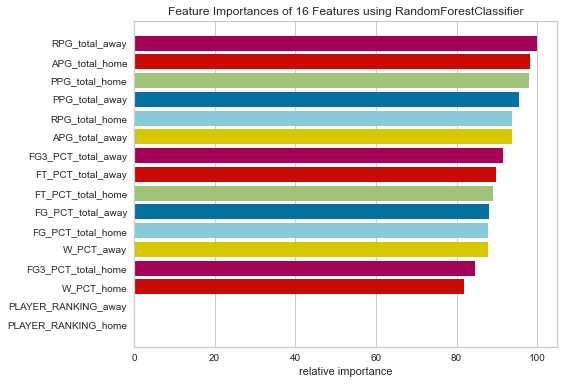

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_depth': 564, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       579
           1       0.74      0.36      0.48       418

    accuracy                           0.68       997
   macro avg       0.70      0.63      0.62       997
weighted avg       0.69      0.68      0.65       997



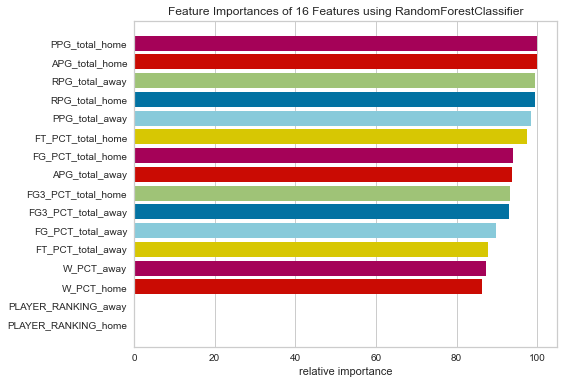

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_depth': 98, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       631
           1       0.66      0.38      0.48       366

    accuracy                           0.70       997
   macro avg       0.69      0.63      0.63       997
weighted avg       0.69      0.70      0.68       997



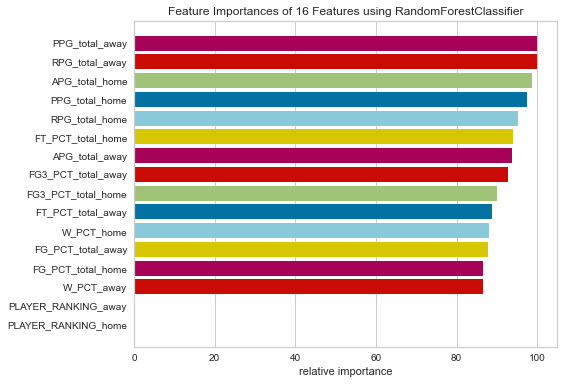

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_depth': 615, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       579
           1       0.75      0.39      0.51       417

    accuracy                           0.69       996
   macro avg       0.71      0.65      0.64       996
weighted avg       0.71      0.69      0.66       996



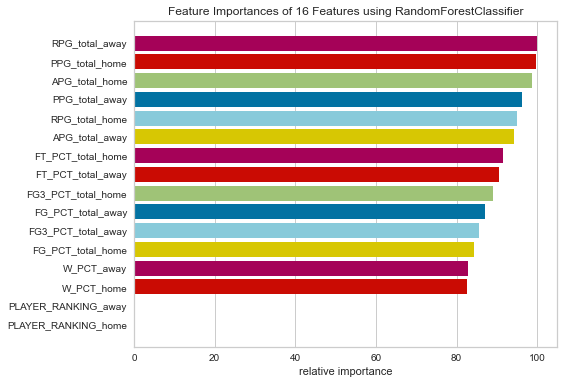

---------------------------------------------
Mean accuracy: 0.6960882647943831
Max accuracy: 0.7061183550651956
Min accuracy: 0.6770310932798396
i=10
FG3:

Best Random Forest accuracy ({'max_depth': 34, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.73      0.67       314
           1       0.66      0.53      0.59       313

    accuracy                           0.63       627
   macro avg       0.64      0.63      0.63       627
weighted avg       0.64      0.63      0.63       627



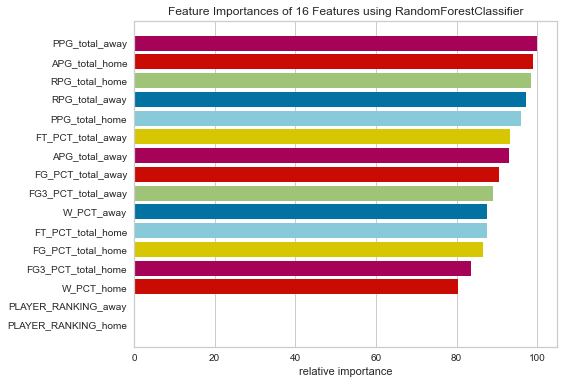

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_depth': 823, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       332
           1       0.65      0.58      0.61       295

    accuracy                           0.65       627
   macro avg       0.65      0.65      0.65       627
weighted avg       0.65      0.65      0.65       627



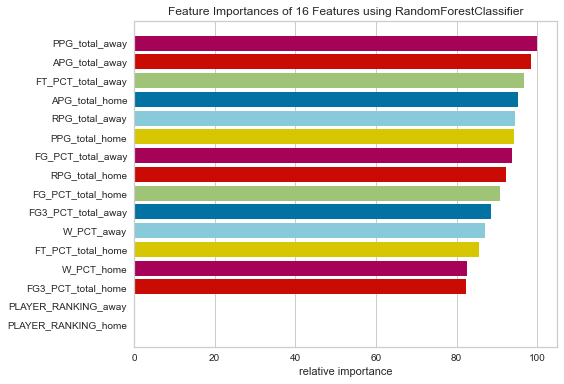

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_depth': 70, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       347
           1       0.64      0.60      0.62       280

    accuracy                           0.67       627
   macro avg       0.67      0.66      0.66       627
weighted avg       0.67      0.67      0.67       627



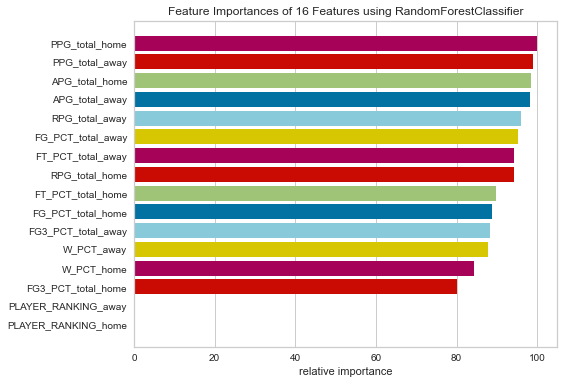

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_depth': 637, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       324
           1       0.64      0.52      0.58       302

    accuracy                           0.63       626
   macro avg       0.63      0.62      0.62       626
weighted avg       0.63      0.63      0.62       626



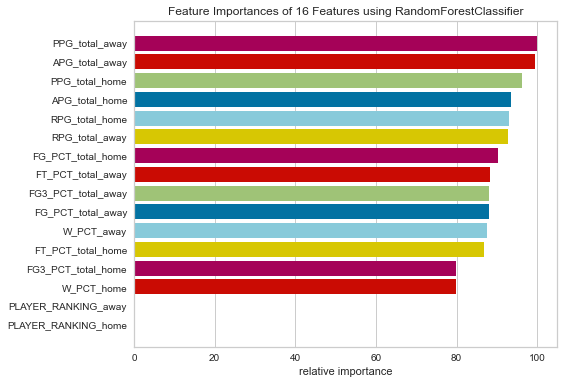

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_depth': 410, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       328
           1       0.65      0.52      0.58       298

    accuracy                           0.64       626
   macro avg       0.64      0.63      0.63       626
weighted avg       0.64      0.64      0.63       626



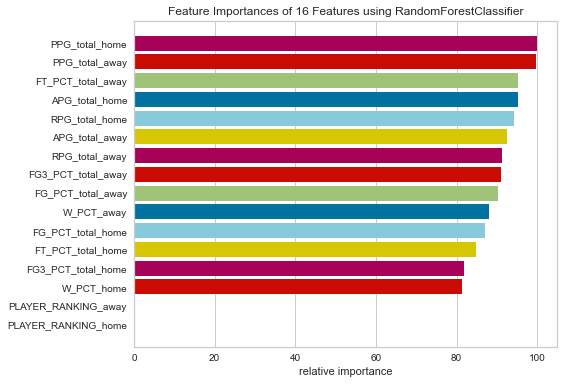

---------------------------------------------
Mean accuracy: 0.6453858833840337
Max accuracy: 0.6698564593301436
Min accuracy: 0.6277955271565495
i=15
FT:

Best Random Forest accuracy ({'max_depth': 930, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       309
           1       0.64      0.67      0.66       328

    accuracy                           0.64       637
   macro avg       0.64      0.64      0.64       637
weighted avg       0.64      0.64      0.64       637



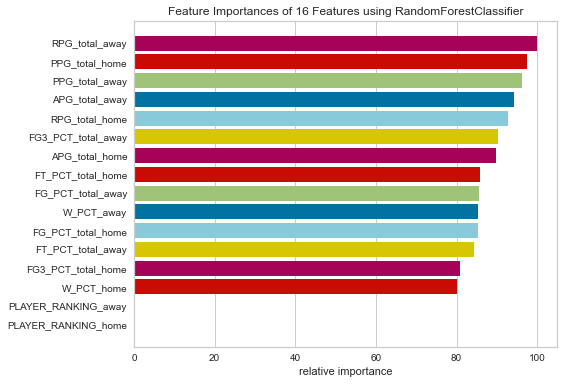

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_depth': 666, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       297
           1       0.67      0.67      0.67       340

    accuracy                           0.65       637
   macro avg       0.65      0.65      0.65       637
weighted avg       0.65      0.65      0.65       637



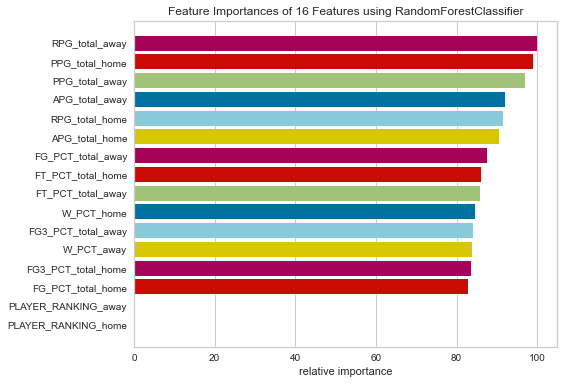

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_depth': 394, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       329
           1       0.60      0.71      0.65       308

    accuracy                           0.63       637
   macro avg       0.64      0.64      0.63       637
weighted avg       0.64      0.63      0.63       637



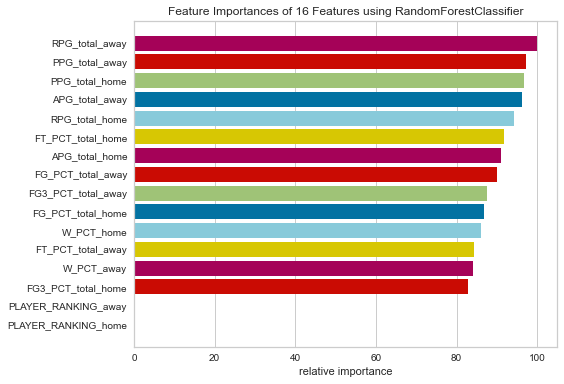

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_depth': 902, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       299
           1       0.64      0.58      0.61       337

    accuracy                           0.61       636
   macro avg       0.61      0.61      0.61       636
weighted avg       0.61      0.61      0.61       636



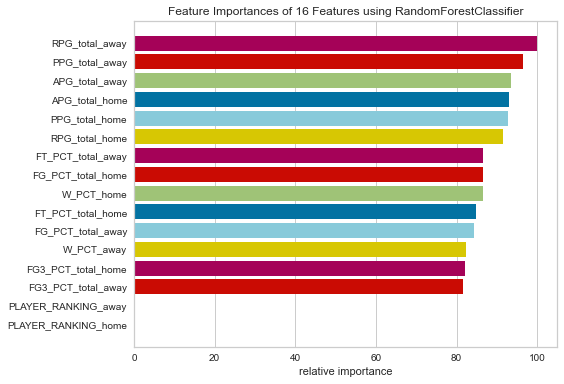

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_depth': 522, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       313
           1       0.64      0.67      0.66       323

    accuracy                           0.64       636
   macro avg       0.64      0.64      0.64       636
weighted avg       0.64      0.64      0.64       636



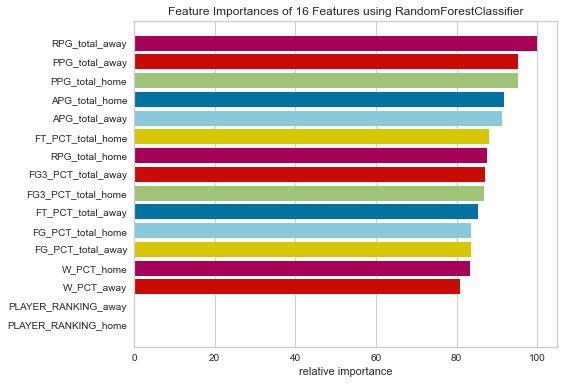

---------------------------------------------
Mean accuracy: 0.6317138611613005
Max accuracy: 0.6483516483516484
Min accuracy: 0.6069182389937107
i=20
AST:

Best Random Forest accuracy ({'max_depth': 875, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.89      0.77       565
           1       0.73      0.42      0.54       397

    accuracy                           0.70       962
   macro avg       0.71      0.66      0.65       962
weighted avg       0.70      0.70      0.68       962



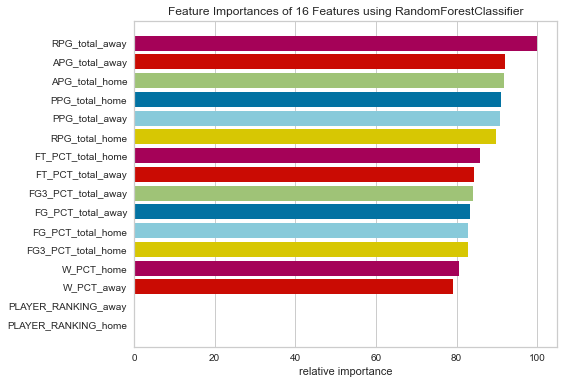

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_depth': 5, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.98      0.74       561
           1       0.66      0.06      0.11       401

    accuracy                           0.59       962
   macro avg       0.62      0.52      0.42       962
weighted avg       0.62      0.59      0.47       962



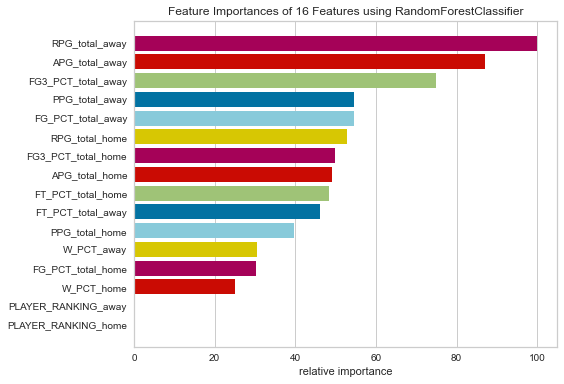

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_depth': 640, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       552
           1       0.72      0.41      0.53       409

    accuracy                           0.68       961
   macro avg       0.70      0.65      0.64       961
weighted avg       0.69      0.68      0.66       961



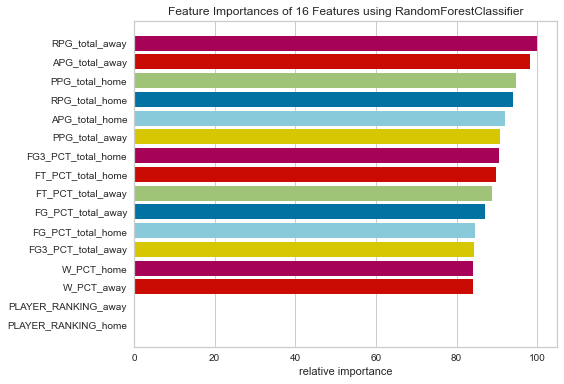

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_depth': 140, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       585
           1       0.65      0.44      0.52       376

    accuracy                           0.69       961
   macro avg       0.67      0.64      0.64       961
weighted avg       0.68      0.69      0.67       961



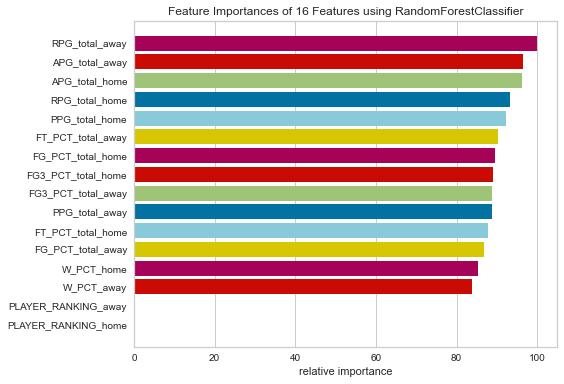

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_depth': 116, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       544
           1       0.72      0.42      0.53       417

    accuracy                           0.68       961
   macro avg       0.69      0.65      0.65       961
weighted avg       0.69      0.68      0.66       961



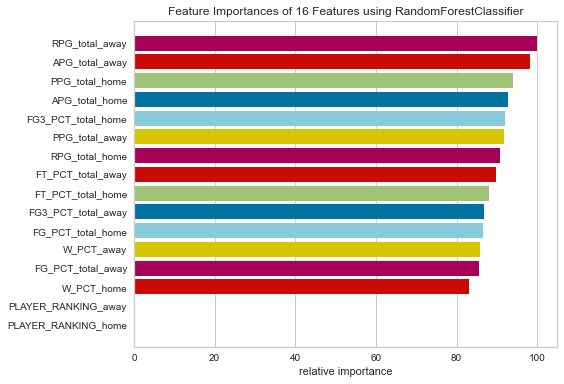

---------------------------------------------
Mean accuracy: 0.6648566440449895
Max accuracy: 0.6964656964656964
Min accuracy: 0.5945945945945946
i=25
REB:

Best Random Forest accuracy ({'max_depth': 879, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       482
           1       0.67      0.43      0.53       352

    accuracy                           0.67       834
   macro avg       0.67      0.64      0.64       834
weighted avg       0.67      0.67      0.65       834



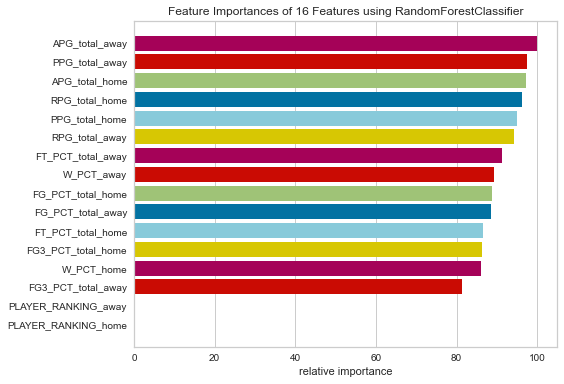

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_depth': 745, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       472
           1       0.68      0.43      0.53       362

    accuracy                           0.66       834
   macro avg       0.67      0.64      0.63       834
weighted avg       0.67      0.66      0.65       834



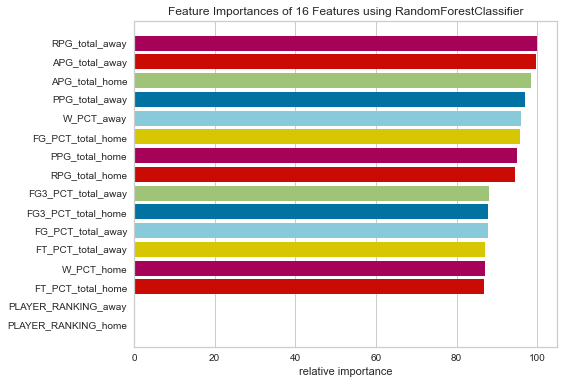

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_depth': 896, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       473
           1       0.70      0.45      0.55       361

    accuracy                           0.68       834
   macro avg       0.69      0.65      0.65       834
weighted avg       0.69      0.68      0.67       834



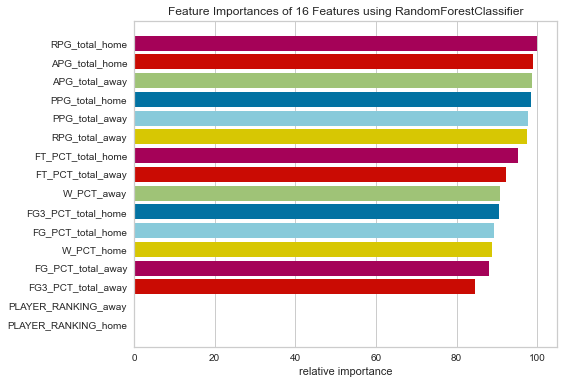

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_depth': 480, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       509
           1       0.61      0.49      0.54       325

    accuracy                           0.68       834
   macro avg       0.66      0.65      0.65       834
weighted avg       0.67      0.68      0.67       834



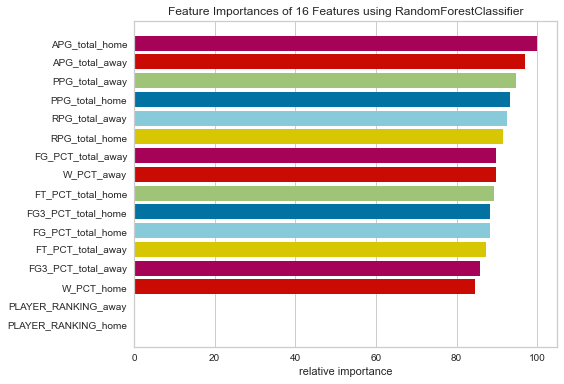

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_depth': 756, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       458
           1       0.71      0.47      0.56       375

    accuracy                           0.68       833
   macro avg       0.69      0.66      0.65       833
weighted avg       0.68      0.68      0.66       833



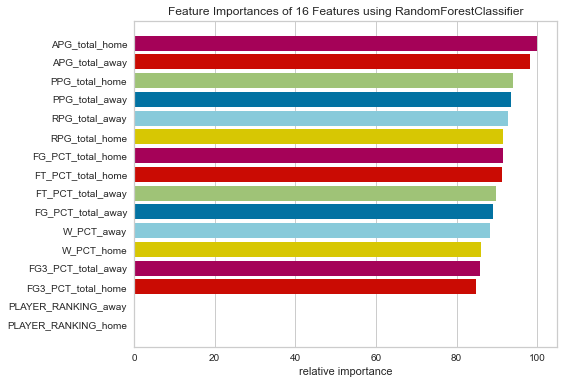

---------------------------------------------
Mean accuracy: 0.6744604316546763
Max accuracy: 0.6810551558752997
Min accuracy: 0.6642685851318945


In [31]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,1000)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       880
           1       0.00      0.00      0.00       494

    accuracy                           0.64      1374
   macro avg       0.32      0.50      0.39      1374
weighted avg       0.41      0.64      0.50      1374



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

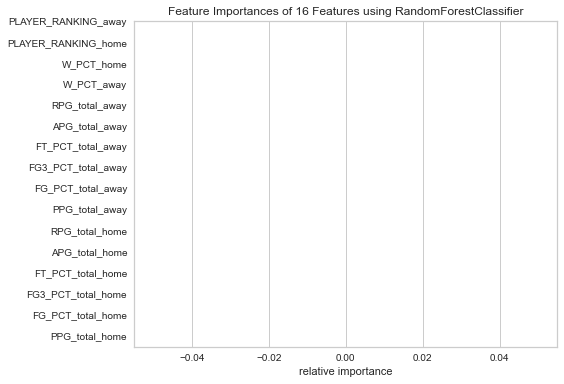

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       856
           1       0.00      0.00      0.00       518

    accuracy                           0.62      1374
   macro avg       0.31      0.50      0.38      1374
weighted avg       0.39      0.62      0.48      1374



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

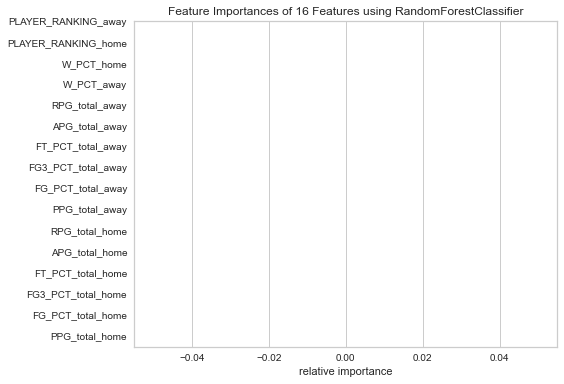

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       862
           1       0.00      0.00      0.00       512

    accuracy                           0.63      1374
   macro avg       0.31      0.50      0.39      1374
weighted avg       0.39      0.63      0.48      1374



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

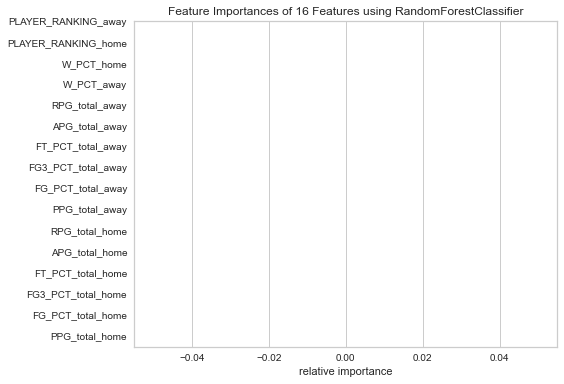

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.05, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       867
           1       0.00      0.00      0.00       506

    accuracy                           0.63      1373
   macro avg       0.32      0.50      0.39      1373
weighted avg       0.40      0.63      0.49      1373



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

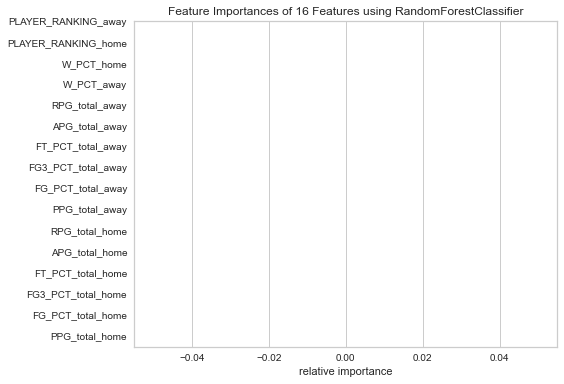

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       873
           1       0.00      0.00      0.00       500

    accuracy                           0.64      1373
   macro avg       0.32      0.50      0.39      1373
weighted avg       0.40      0.64      0.49      1373



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

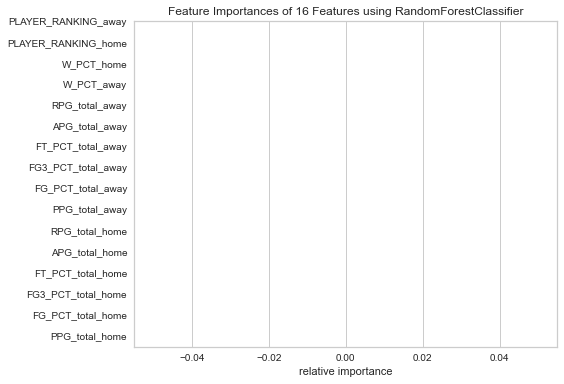

---------------------------------------------
Mean accuracy: 0.6305734104708078
Max accuracy: 0.6404657933042213
Min accuracy: 0.6229985443959243
i=5
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       589
           1       0.00      0.00      0.00       408

    accuracy                           0.59       997
   macro avg       0.30      0.50      0.37       997
weighted avg       0.35      0.59      0.44       997



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

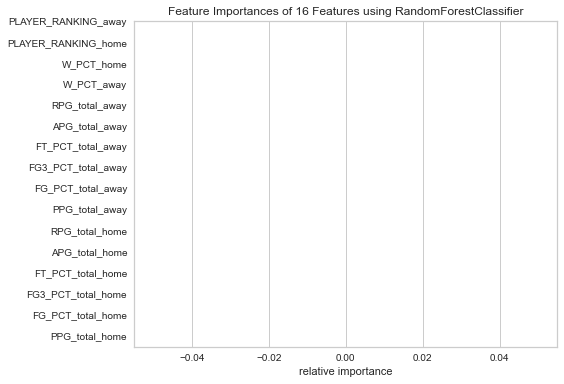

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       629
           1       0.00      0.00      0.00       368

    accuracy                           0.63       997
   macro avg       0.32      0.50      0.39       997
weighted avg       0.40      0.63      0.49       997



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

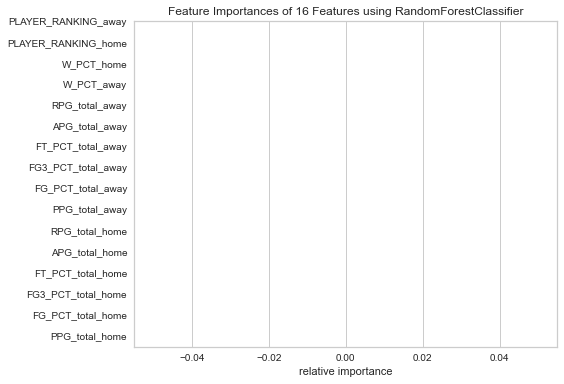

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       579
           1       0.00      0.00      0.00       418

    accuracy                           0.58       997
   macro avg       0.29      0.50      0.37       997
weighted avg       0.34      0.58      0.43       997



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

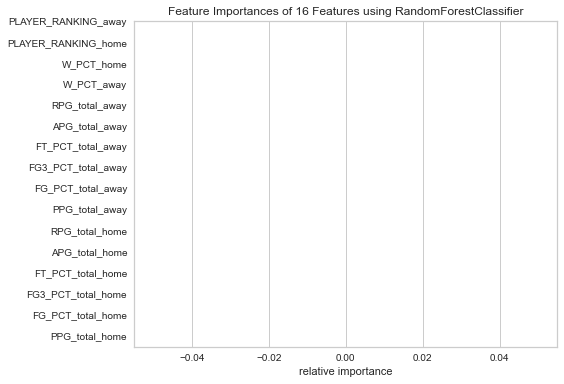

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.9, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       631
           1       0.00      0.00      0.00       366

    accuracy                           0.63       997
   macro avg       0.32      0.50      0.39       997
weighted avg       0.40      0.63      0.49       997



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

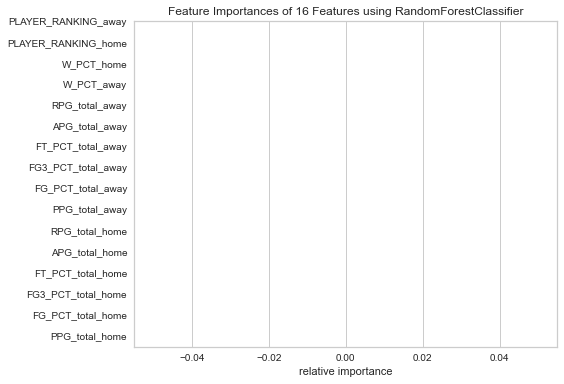

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       579
           1       0.00      0.00      0.00       417

    accuracy                           0.58       996
   macro avg       0.29      0.50      0.37       996
weighted avg       0.34      0.58      0.43       996



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

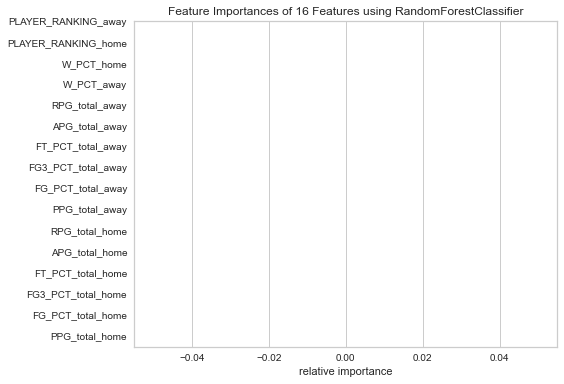

---------------------------------------------
Mean accuracy: 0.6088264794383149
Max accuracy: 0.6328986960882648
Min accuracy: 0.5807422266800402
i=10
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       314
           1       0.00      0.00      0.00       313

    accuracy                           0.50       627
   macro avg       0.25      0.50      0.33       627
weighted avg       0.25      0.50      0.33       627



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

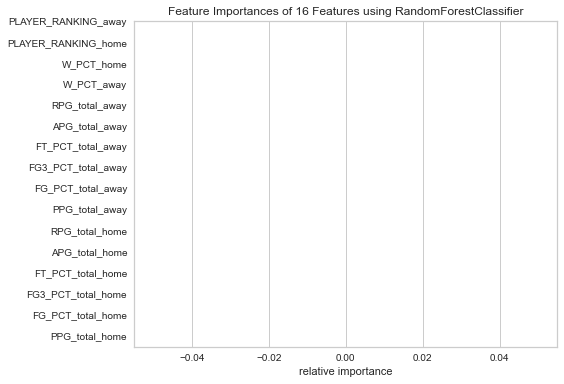

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.05, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       332
           1       0.00      0.00      0.00       295

    accuracy                           0.53       627
   macro avg       0.26      0.50      0.35       627
weighted avg       0.28      0.53      0.37       627



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

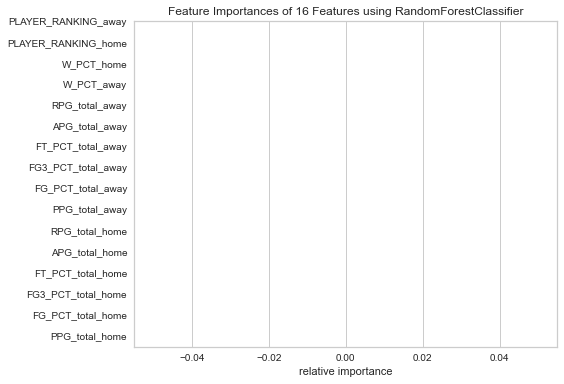

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       347
           1       0.00      0.00      0.00       280

    accuracy                           0.55       627
   macro avg       0.28      0.50      0.36       627
weighted avg       0.31      0.55      0.39       627



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

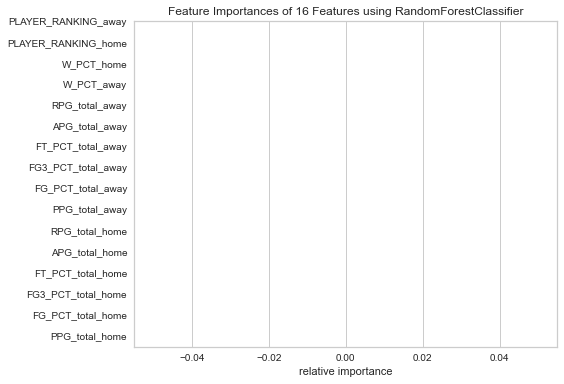

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       324
           1       0.00      0.00      0.00       302

    accuracy                           0.52       626
   macro avg       0.26      0.50      0.34       626
weighted avg       0.27      0.52      0.35       626



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

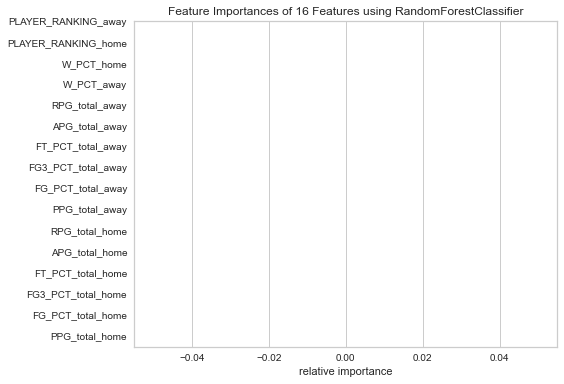

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.72      0.66       328
           1       0.62      0.51      0.56       298

    accuracy                           0.62       626
   macro avg       0.62      0.61      0.61       626
weighted avg       0.62      0.62      0.62       626



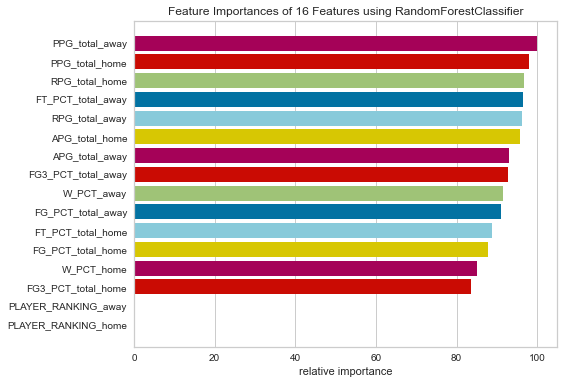

---------------------------------------------
Mean accuracy: 0.5253259856000734
Max accuracy: 0.5534290271132376
Min accuracy: 0.5007974481658692
i=15
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       309
           1       0.66      0.66      0.66       328

    accuracy                           0.65       637
   macro avg       0.65      0.65      0.65       637
weighted avg       0.65      0.65      0.65       637



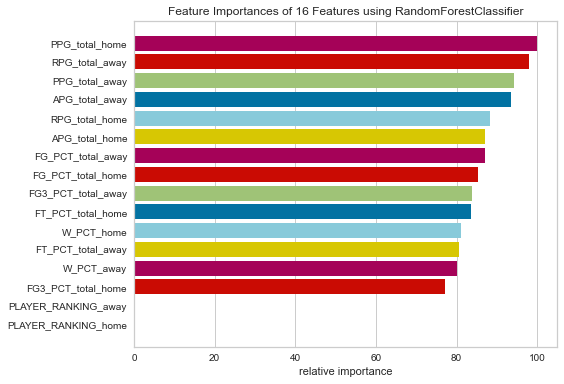

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       297
           1       0.67      0.67      0.67       340

    accuracy                           0.65       637
   macro avg       0.65      0.65      0.65       637
weighted avg       0.65      0.65      0.65       637



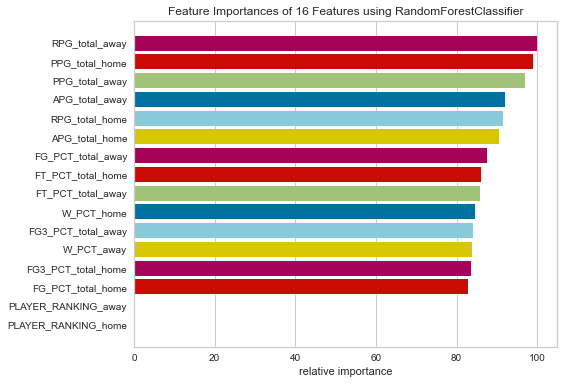

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.48      1.00      0.65       308

    accuracy                           0.48       637
   macro avg       0.24      0.50      0.33       637
weighted avg       0.23      0.48      0.32       637



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

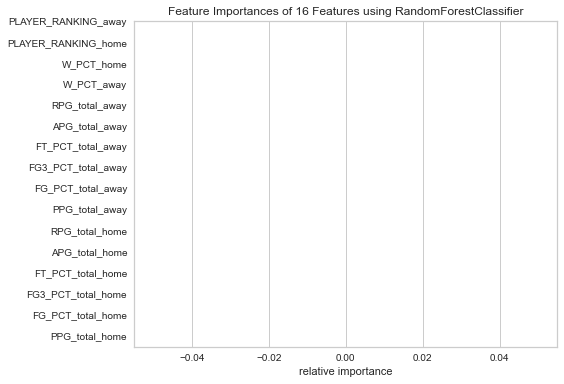

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       299
           1       0.53      1.00      0.69       337

    accuracy                           0.53       636
   macro avg       0.26      0.50      0.35       636
weighted avg       0.28      0.53      0.37       636



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

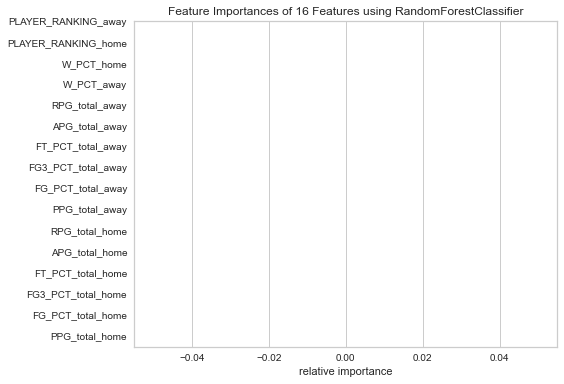

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       313
           1       0.64      0.67      0.66       323

    accuracy                           0.64       636
   macro avg       0.64      0.64      0.64       636
weighted avg       0.64      0.64      0.64       636



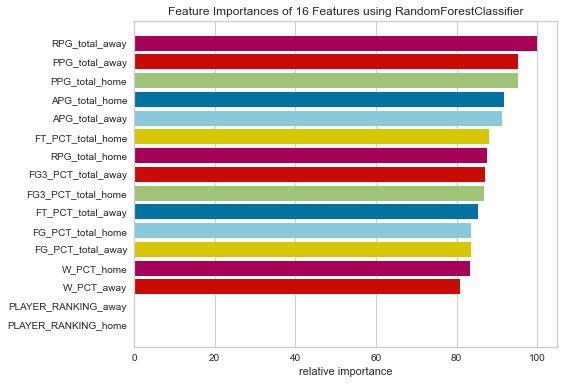

---------------------------------------------
Mean accuracy: 0.5783084278704225
Max accuracy: 0.6514913657770801
Min accuracy: 0.4835164835164835
i=20
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.75, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       565
           1       0.00      0.00      0.00       397

    accuracy                           0.59       962
   macro avg       0.29      0.50      0.37       962
weighted avg       0.34      0.59      0.43       962



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

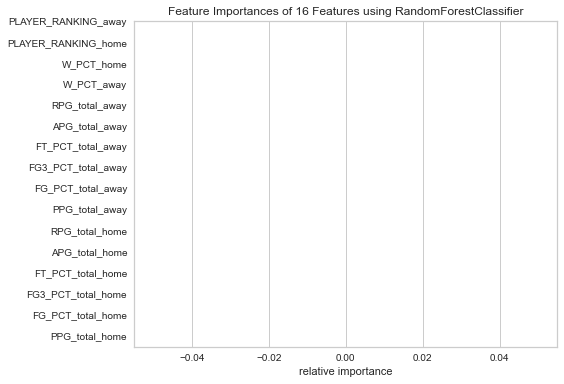

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       561
           1       0.00      0.00      0.00       401

    accuracy                           0.58       962
   macro avg       0.29      0.50      0.37       962
weighted avg       0.34      0.58      0.43       962



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

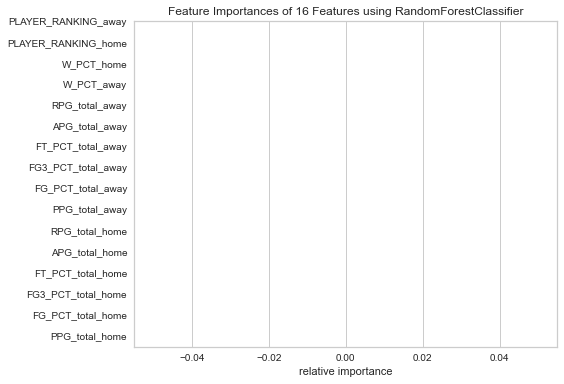

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.9, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       552
           1       0.00      0.00      0.00       409

    accuracy                           0.57       961
   macro avg       0.29      0.50      0.36       961
weighted avg       0.33      0.57      0.42       961



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

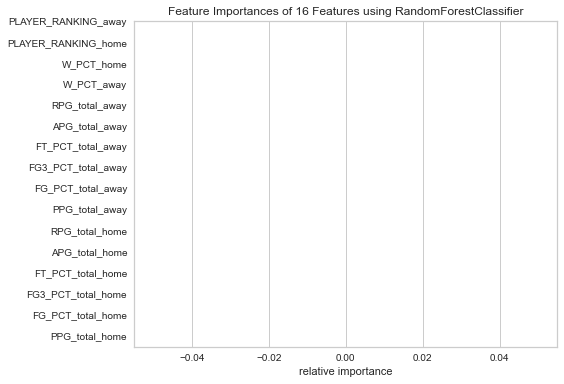

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       585
           1       0.00      0.00      0.00       376

    accuracy                           0.61       961
   macro avg       0.30      0.50      0.38       961
weighted avg       0.37      0.61      0.46       961



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

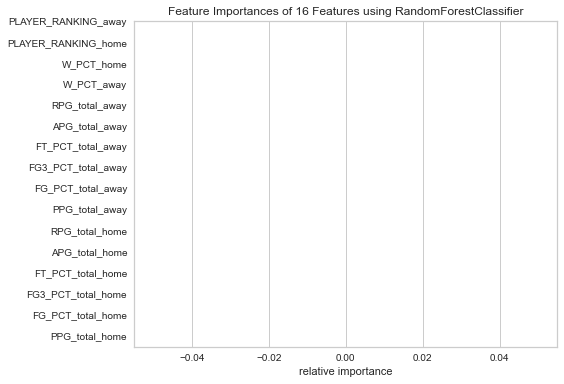

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       544
           1       0.00      0.00      0.00       417

    accuracy                           0.57       961
   macro avg       0.28      0.50      0.36       961
weighted avg       0.32      0.57      0.41       961



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

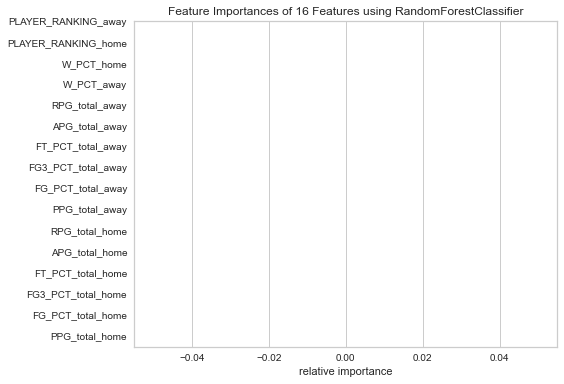

---------------------------------------------
Mean accuracy: 0.5884051825779193
Max accuracy: 0.6087408949011447
Min accuracy: 0.5744016649323621
i=25
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       482
           1       0.00      0.00      0.00       352

    accuracy                           0.58       834
   macro avg       0.29      0.50      0.37       834
weighted avg       0.33      0.58      0.42       834



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

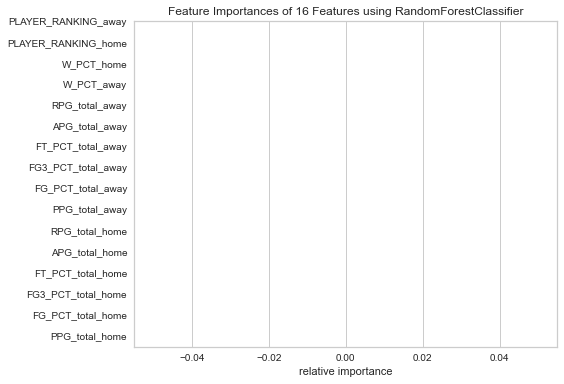

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       472
           1       0.00      0.00      0.00       362

    accuracy                           0.57       834
   macro avg       0.28      0.50      0.36       834
weighted avg       0.32      0.57      0.41       834



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

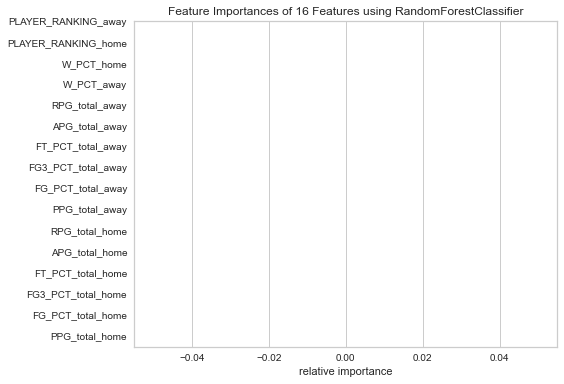

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       473
           1       0.00      0.00      0.00       361

    accuracy                           0.57       834
   macro avg       0.28      0.50      0.36       834
weighted avg       0.32      0.57      0.41       834



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

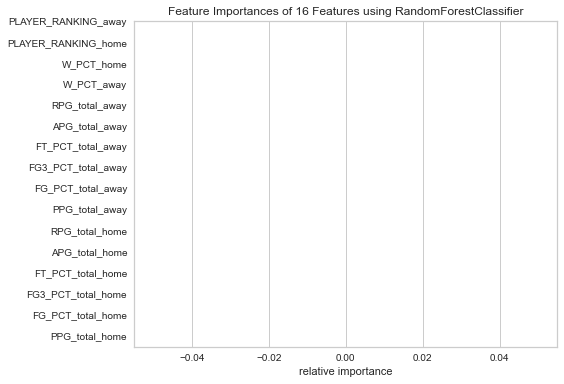

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.05, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       509
           1       0.00      0.00      0.00       325

    accuracy                           0.61       834
   macro avg       0.31      0.50      0.38       834
weighted avg       0.37      0.61      0.46       834



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

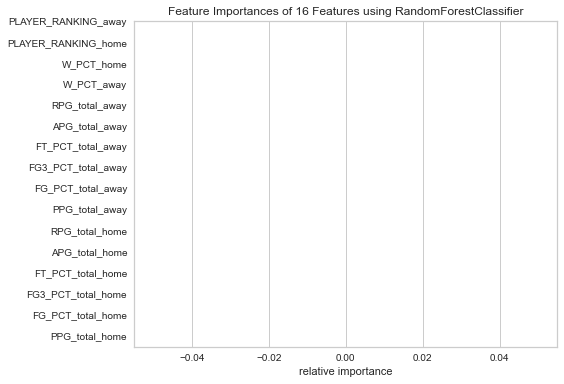

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       458
           1       0.00      0.00      0.00       375

    accuracy                           0.55       833
   macro avg       0.27      0.50      0.35       833
weighted avg       0.30      0.55      0.39       833



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

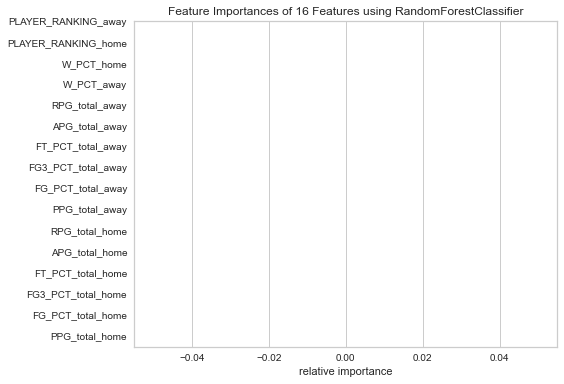

---------------------------------------------
Mean accuracy: 0.580335731414868
Max accuracy: 0.6103117505995204
Min accuracy: 0.565947242206235


In [32]:

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})


## Try prune max leaves

i=0
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 736, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       880
           1       0.72      0.31      0.44       494

    accuracy                           0.71      1374
   macro avg       0.72      0.62      0.62      1374
weighted avg       0.71      0.71      0.67      1374



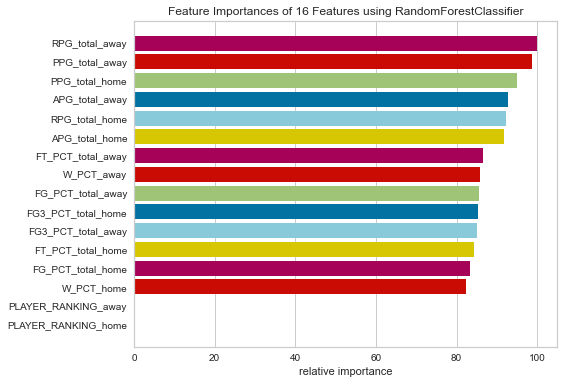

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 1248, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       856
           1       0.75      0.31      0.44       518

    accuracy                           0.70      1374
   macro avg       0.72      0.62      0.62      1374
weighted avg       0.71      0.70      0.66      1374



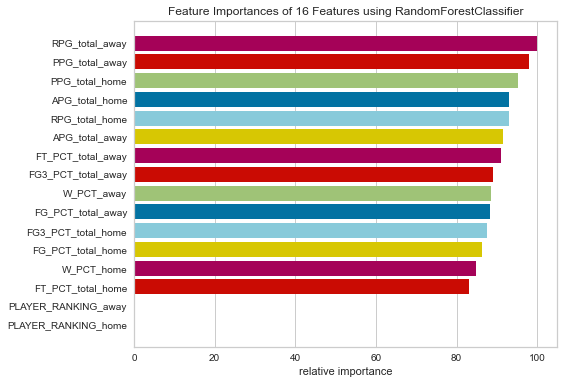

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 1424, 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       862
           1       0.74      0.37      0.49       512

    accuracy                           0.72      1374
   macro avg       0.72      0.64      0.65      1374
weighted avg       0.72      0.72      0.69      1374



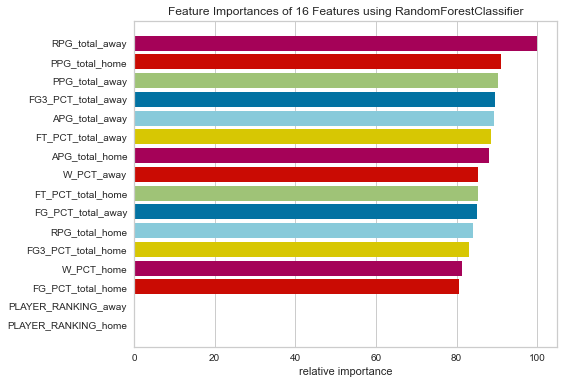

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 1708, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       867
           1       0.72      0.34      0.46       506

    accuracy                           0.71      1373
   macro avg       0.71      0.63      0.63      1373
weighted avg       0.71      0.71      0.67      1373



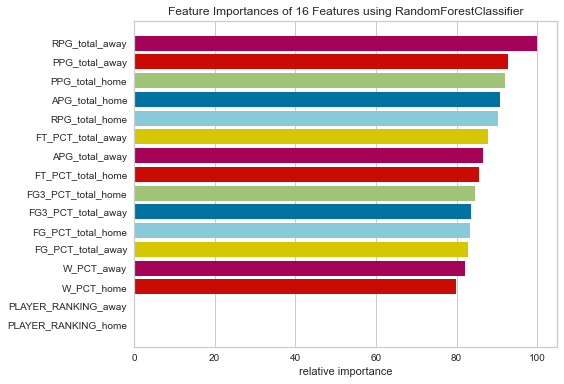

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 1454, 'criterion': 'gini'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       873
           1       0.76      0.37      0.50       500

    accuracy                           0.73      1373
   macro avg       0.74      0.65      0.66      1373
weighted avg       0.73      0.73      0.70      1373



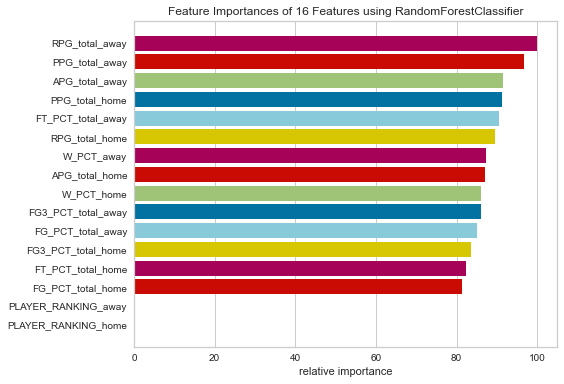

---------------------------------------------
Mean accuracy: 0.7084620106419182
Max accuracy: 0.715429403202329
Min accuracy: 0.7008733624454149
i=5
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 1960, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       589
           1       0.77      0.40      0.53       408

    accuracy                           0.71       997
   macro avg       0.73      0.66      0.66       997
weighted avg       0.72      0.71      0.68       997



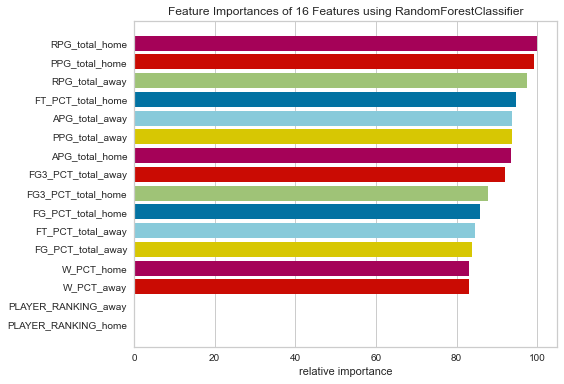

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 574, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       629
           1       0.66      0.41      0.50       368

    accuracy                           0.70       997
   macro avg       0.69      0.64      0.65       997
weighted avg       0.70      0.70      0.68       997



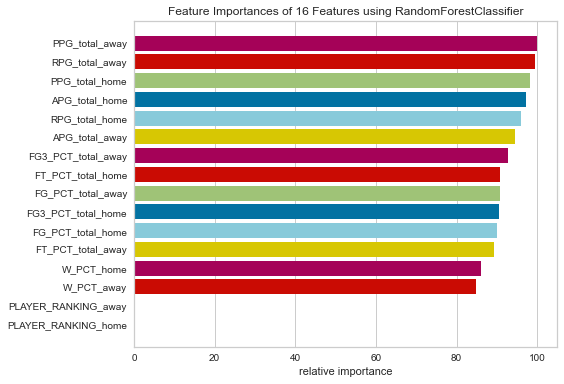

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 1676, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       579
           1       0.71      0.34      0.46       418

    accuracy                           0.67       997
   macro avg       0.68      0.62      0.61       997
weighted avg       0.68      0.67      0.64       997



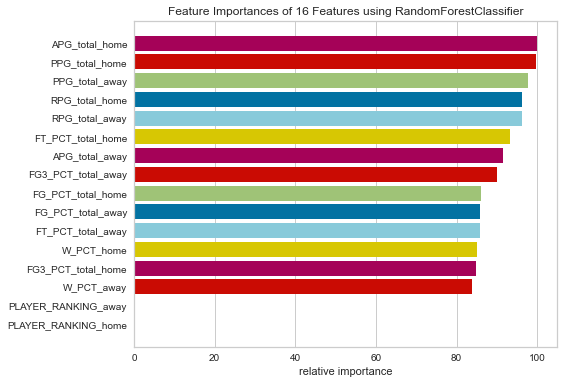

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 1910, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       631
           1       0.65      0.38      0.48       366

    accuracy                           0.70       997
   macro avg       0.68      0.63      0.63       997
weighted avg       0.69      0.70      0.67       997



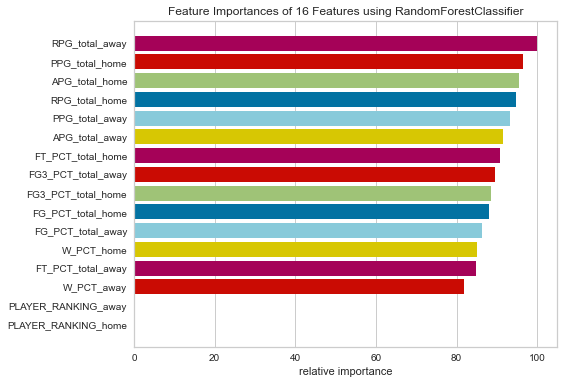

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 1492, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       579
           1       0.75      0.37      0.49       417

    accuracy                           0.68       996
   macro avg       0.71      0.64      0.63       996
weighted avg       0.70      0.68      0.65       996



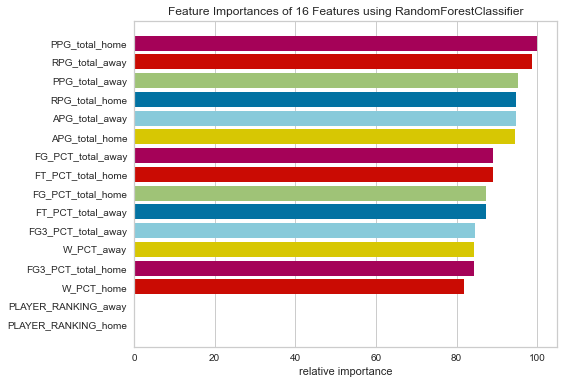

---------------------------------------------
Mean accuracy: 0.6940822467402207
Max accuracy: 0.708124373119358
Min accuracy: 0.6670010030090271
i=10
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 454, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       314
           1       0.69      0.58      0.63       313

    accuracy                           0.66       627
   macro avg       0.66      0.66      0.66       627
weighted avg       0.66      0.66      0.66       627



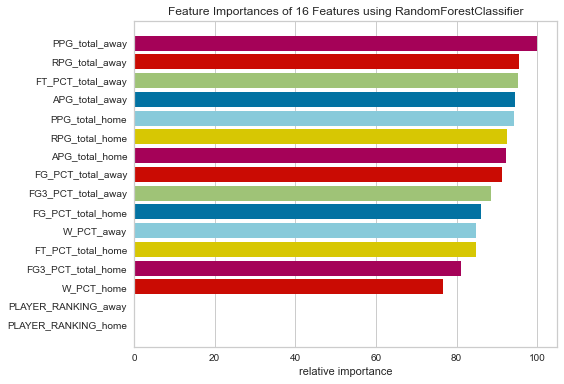

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 454, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       332
           1       0.66      0.57      0.61       295

    accuracy                           0.66       627
   macro avg       0.66      0.66      0.66       627
weighted avg       0.66      0.66      0.66       627



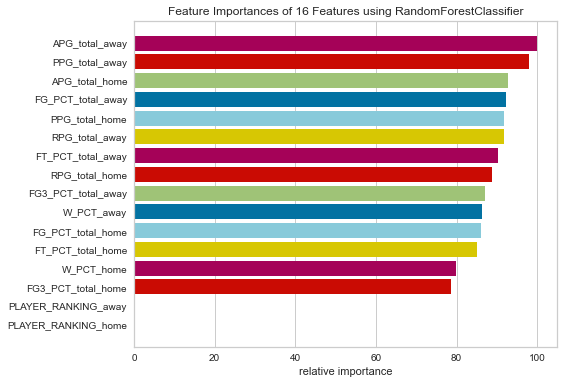

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 1008, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       347
           1       0.65      0.60      0.62       280

    accuracy                           0.68       627
   macro avg       0.67      0.67      0.67       627
weighted avg       0.67      0.68      0.67       627



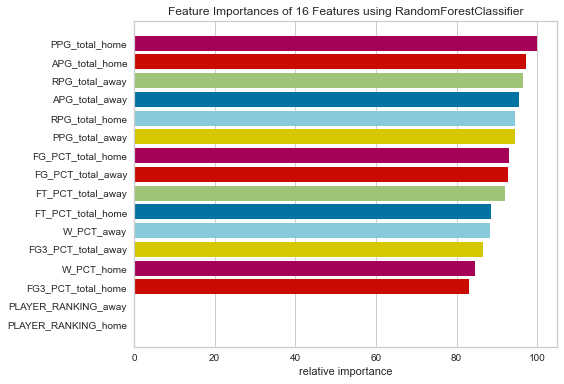

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 1730, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       324
           1       0.65      0.57      0.61       302

    accuracy                           0.64       626
   macro avg       0.64      0.64      0.64       626
weighted avg       0.64      0.64      0.64       626



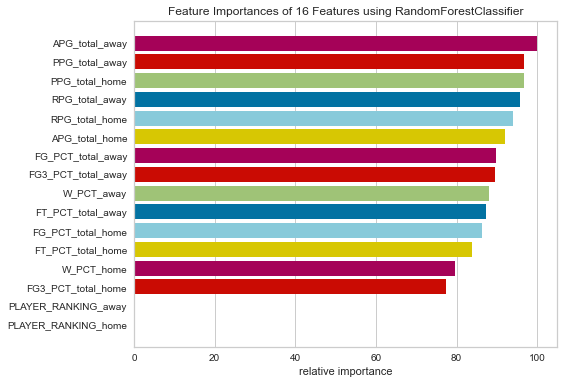

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 380, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       328
           1       0.60      0.50      0.55       298

    accuracy                           0.61       626
   macro avg       0.61      0.60      0.60       626
weighted avg       0.61      0.61      0.60       626



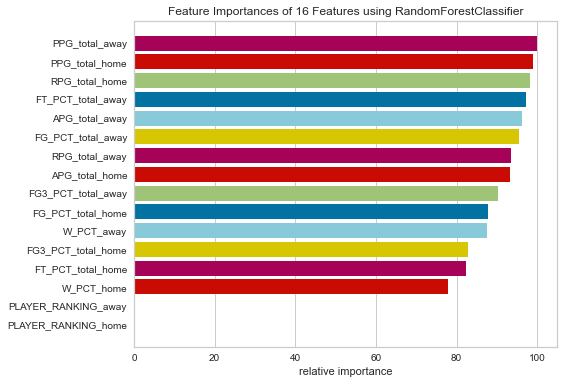

---------------------------------------------
Mean accuracy: 0.6601444069074807
Max accuracy: 0.6762360446570973
Min accuracy: 0.6421725239616614
i=15
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 730, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       309
           1       0.66      0.69      0.68       328

    accuracy                           0.66       637
   macro avg       0.66      0.66      0.66       637
weighted avg       0.66      0.66      0.66       637



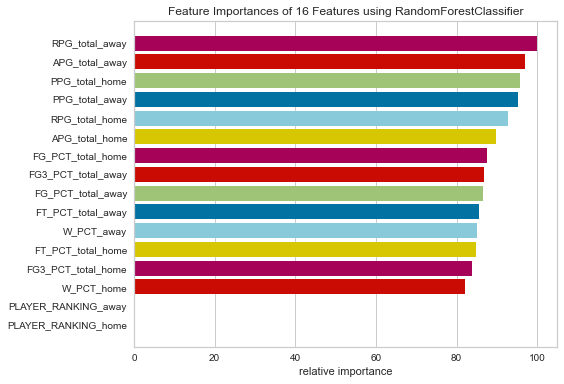

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 340, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       297
           1       0.69      0.69      0.69       340

    accuracy                           0.67       637
   macro avg       0.67      0.67      0.67       637
weighted avg       0.67      0.67      0.67       637



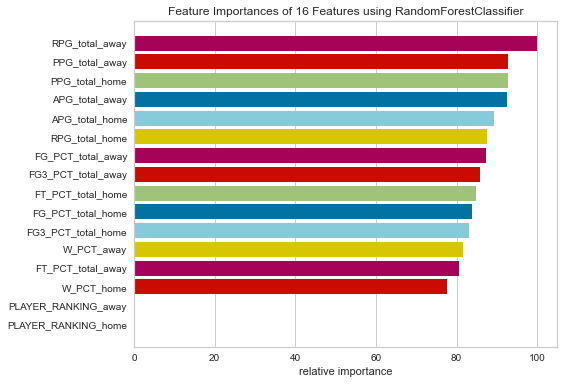

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 1920, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       329
           1       0.62      0.74      0.67       308

    accuracy                           0.65       637
   macro avg       0.66      0.65      0.65       637
weighted avg       0.66      0.65      0.65       637



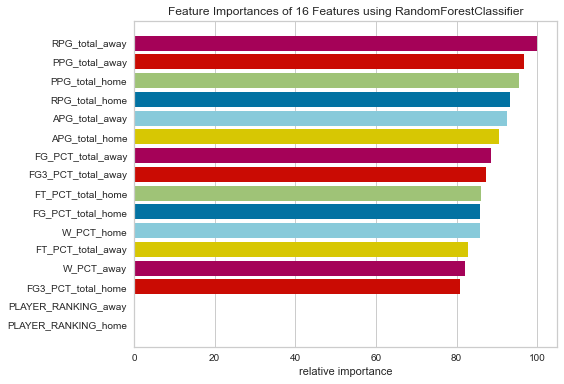

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 1742, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       299
           1       0.67      0.63      0.65       337

    accuracy                           0.64       636
   macro avg       0.64      0.64      0.64       636
weighted avg       0.64      0.64      0.64       636



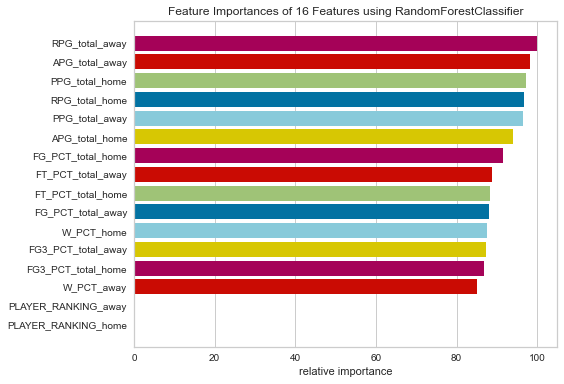

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 1658, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.60      0.60       313
           1       0.62      0.63      0.62       323

    accuracy                           0.61       636
   macro avg       0.61      0.61      0.61       636
weighted avg       0.61      0.61      0.61       636



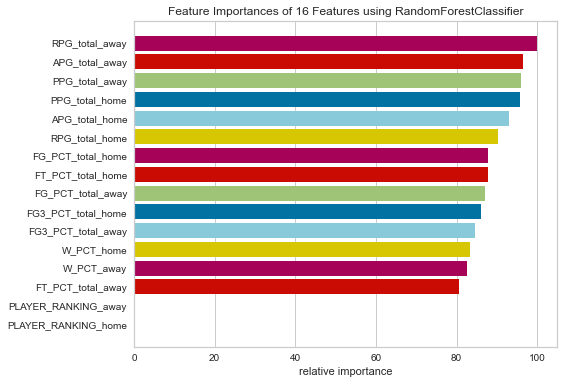

---------------------------------------------
Mean accuracy: 0.6556677823524184
Max accuracy: 0.6718995290423861
Min accuracy: 0.6415094339622641
i=20
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 504, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       565
           1       0.74      0.44      0.55       397

    accuracy                           0.70       962
   macro avg       0.72      0.67      0.67       962
weighted avg       0.71      0.70      0.69       962



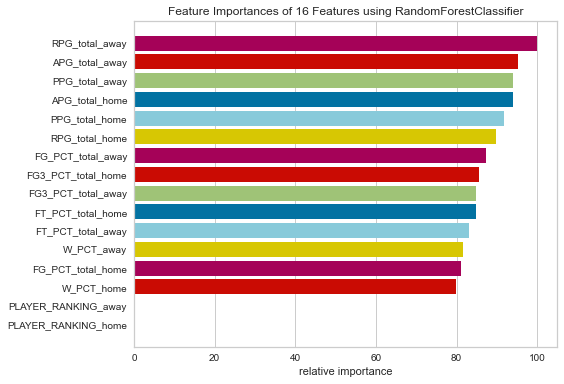

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 1538, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       561
           1       0.70      0.44      0.54       401

    accuracy                           0.69       962
   macro avg       0.69      0.65      0.65       962
weighted avg       0.69      0.69      0.67       962



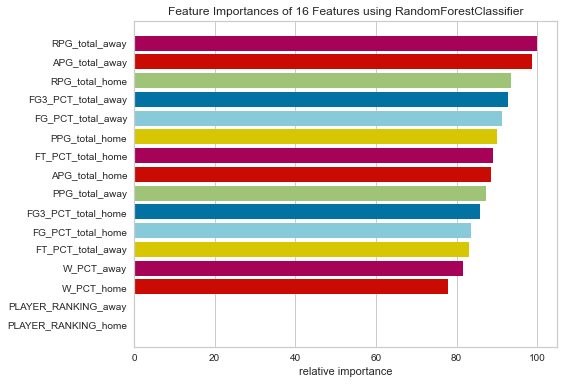

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 78, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       552
           1       0.67      0.22      0.34       409

    accuracy                           0.62       961
   macro avg       0.64      0.57      0.54       961
weighted avg       0.64      0.62      0.57       961



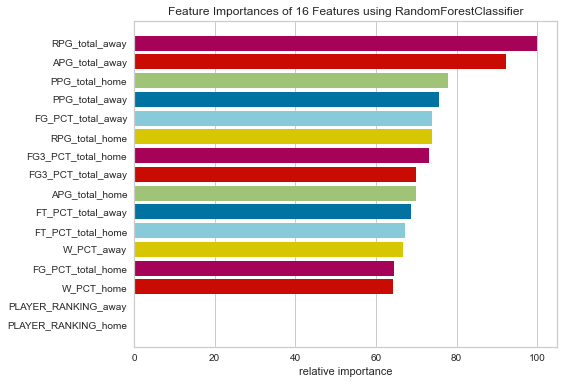

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 1774, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.85      0.76       585
           1       0.64      0.42      0.51       376

    accuracy                           0.68       961
   macro avg       0.67      0.63      0.64       961
weighted avg       0.67      0.68      0.66       961



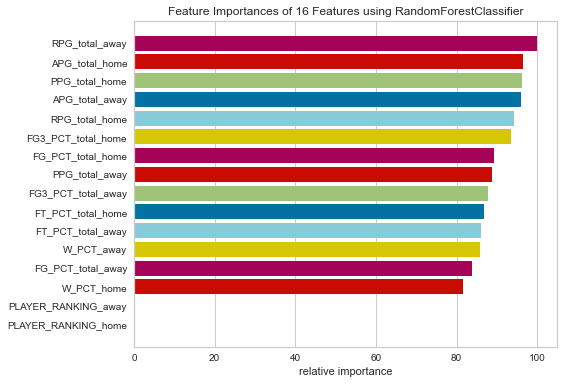

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 6, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.99      0.73       544
           1       0.79      0.03      0.05       417

    accuracy                           0.57       961
   macro avg       0.68      0.51      0.39       961
weighted avg       0.66      0.57      0.43       961



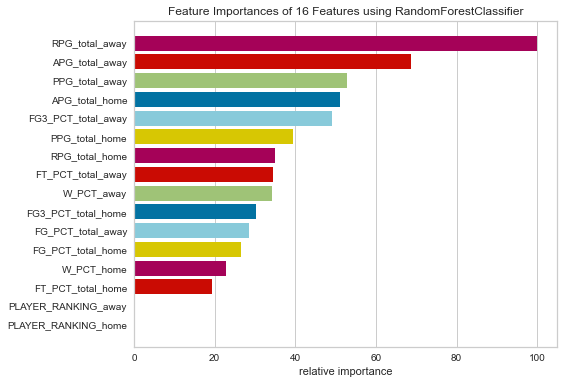

---------------------------------------------
Mean accuracy: 0.6739355119948252
Max accuracy: 0.7047817047817048
Min accuracy: 0.6233090530697191
i=25
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 1464, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       482
           1       0.65      0.43      0.52       352

    accuracy                           0.66       834
   macro avg       0.66      0.63      0.63       834
weighted avg       0.66      0.66      0.65       834



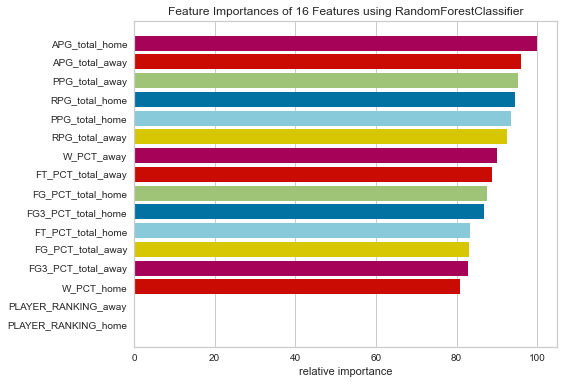

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 660, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       472
           1       0.69      0.42      0.52       362

    accuracy                           0.66       834
   macro avg       0.67      0.64      0.63       834
weighted avg       0.67      0.66      0.65       834



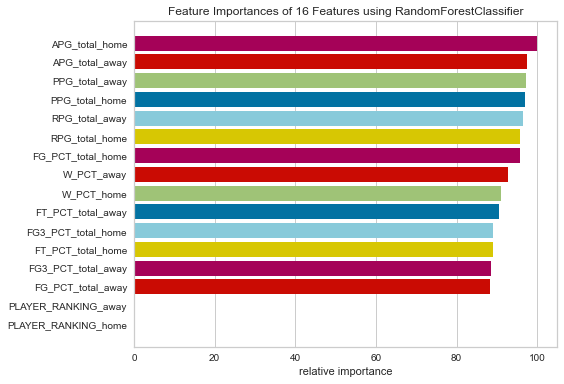

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 1446, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       473
           1       0.69      0.45      0.55       361

    accuracy                           0.68       834
   macro avg       0.68      0.65      0.65       834
weighted avg       0.68      0.68      0.66       834



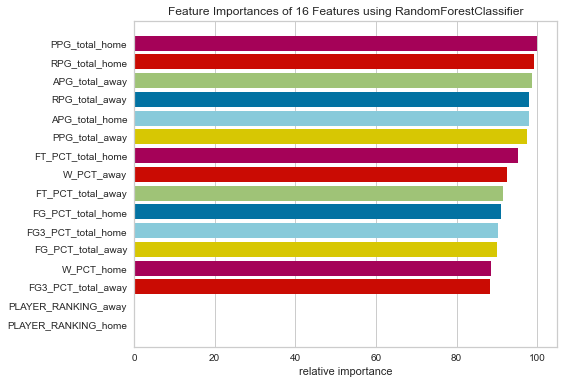

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 1396, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       509
           1       0.60      0.50      0.54       325

    accuracy                           0.67       834
   macro avg       0.65      0.64      0.64       834
weighted avg       0.67      0.67      0.67       834



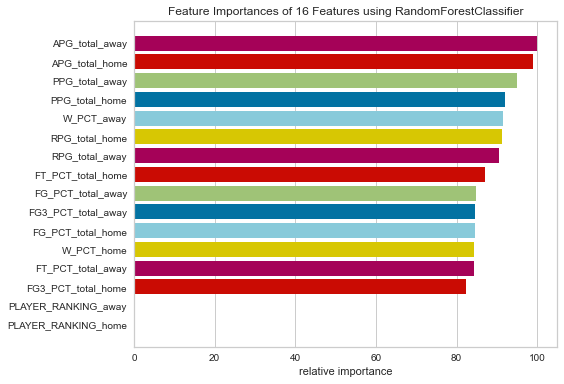

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 1354, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       458
           1       0.73      0.46      0.57       375

    accuracy                           0.68       833
   macro avg       0.70      0.66      0.66       833
weighted avg       0.69      0.68      0.67       833



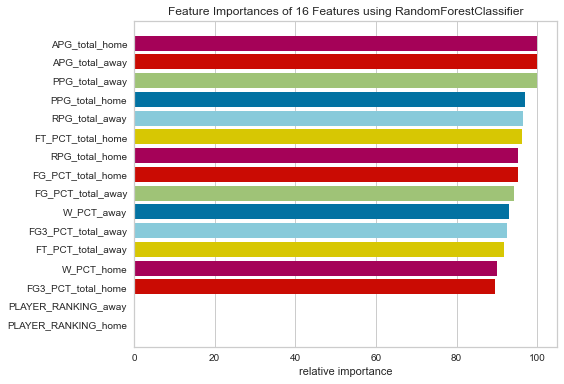

---------------------------------------------
Mean accuracy: 0.6687649880095923
Max accuracy: 0.6750599520383693
Min accuracy: 0.6618705035971223


In [33]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,2000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       880
           1       0.69      0.32      0.44       494

    accuracy                           0.70      1374
   macro avg       0.70      0.62      0.62      1374
weighted avg       0.70      0.70      0.67      1374



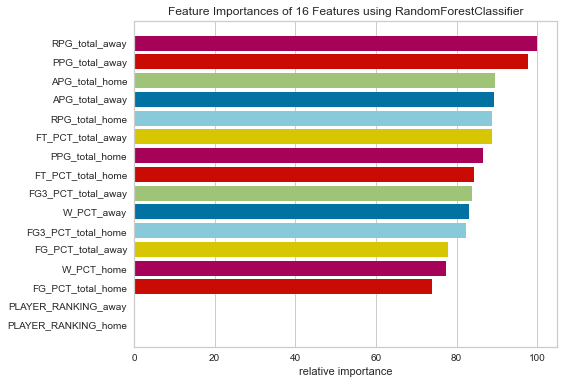

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       856
           1       0.75      0.35      0.48       518

    accuracy                           0.71      1374
   macro avg       0.73      0.64      0.64      1374
weighted avg       0.72      0.71      0.68      1374



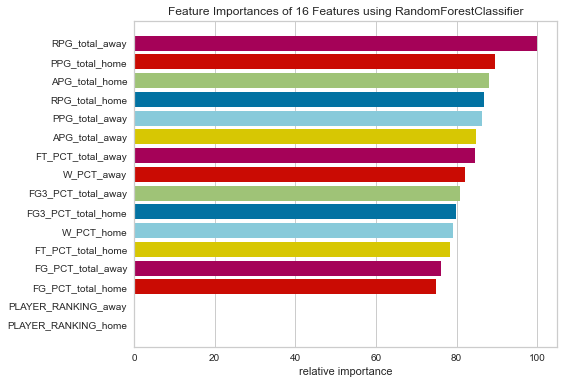

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_features': 3, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       862
           1       0.74      0.33      0.46       512

    accuracy                           0.71      1374
   macro avg       0.72      0.63      0.63      1374
weighted avg       0.72      0.71      0.67      1374



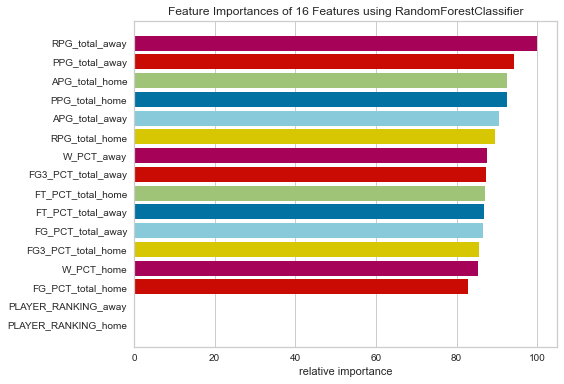

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.72
              precision    recall  f1-score   support

           0       0.72      0.92      0.80       867
           1       0.72      0.38      0.49       506

    accuracy                           0.72      1373
   macro avg       0.72      0.65      0.65      1373
weighted avg       0.72      0.72      0.69      1373



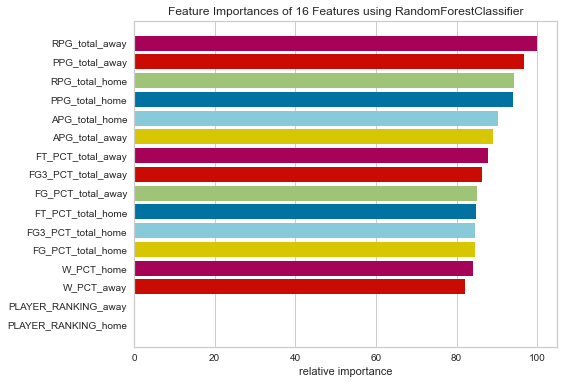

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       873
           1       0.75      0.33      0.46       500

    accuracy                           0.72      1373
   macro avg       0.73      0.63      0.63      1373
weighted avg       0.72      0.72      0.68      1373



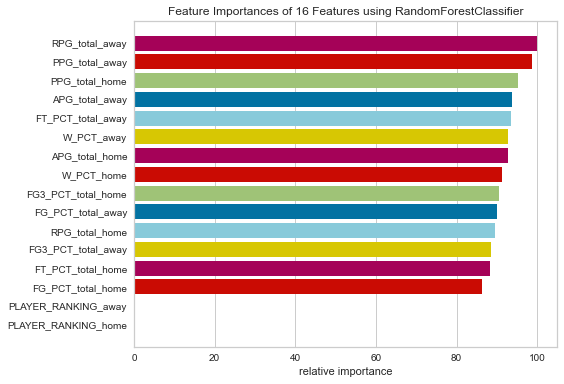

---------------------------------------------
Mean accuracy: 0.7101012879922736
Max accuracy: 0.7166788055353241
Min accuracy: 0.7045123726346434
i=5
FGP:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.67      0.95      0.78       589
           1       0.81      0.32      0.46       408

    accuracy                           0.69       997
   macro avg       0.74      0.63      0.62       997
weighted avg       0.72      0.69      0.65       997



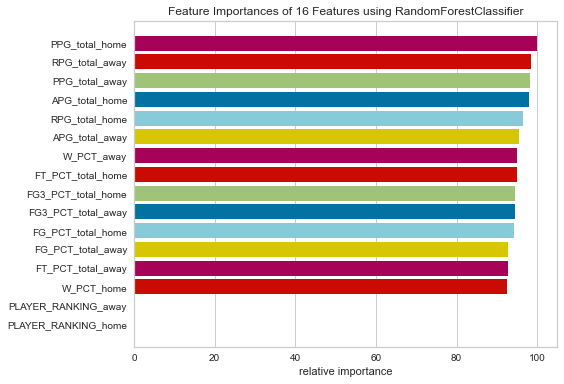

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       629
           1       0.64      0.39      0.48       368

    accuracy                           0.69       997
   macro avg       0.67      0.63      0.63       997
weighted avg       0.68      0.69      0.67       997



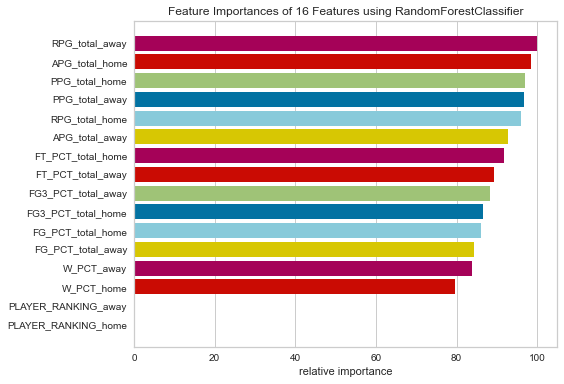

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       579
           1       0.72      0.31      0.43       418

    accuracy                           0.66       997
   macro avg       0.68      0.61      0.60       997
weighted avg       0.68      0.66      0.62       997



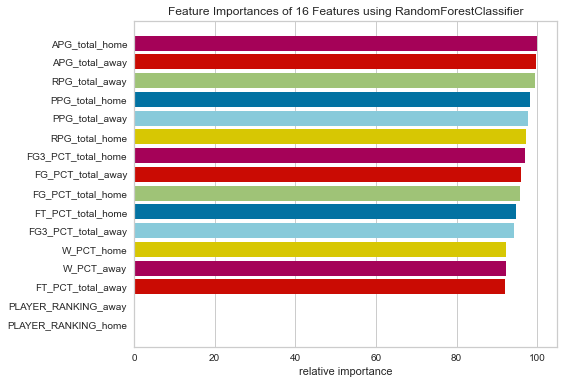

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_features': 12, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       631
           1       0.66      0.41      0.51       366

    accuracy                           0.71       997
   macro avg       0.69      0.64      0.65       997
weighted avg       0.70      0.71      0.69       997



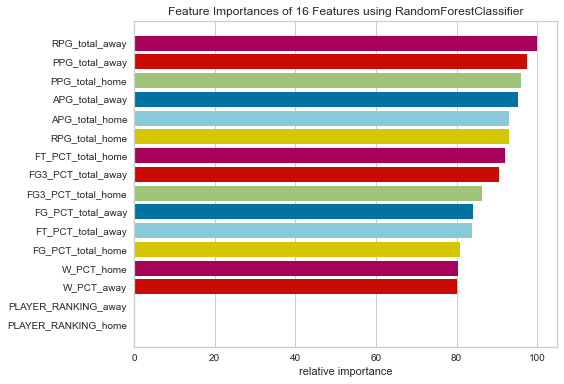

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.67      0.91      0.78       579
           1       0.76      0.39      0.51       417

    accuracy                           0.69       996
   macro avg       0.72      0.65      0.64       996
weighted avg       0.71      0.69      0.67       996



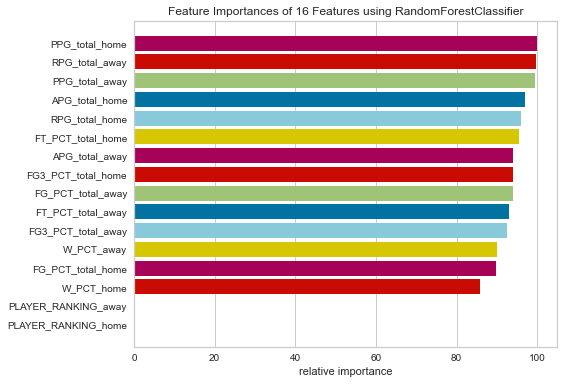

---------------------------------------------
Mean accuracy: 0.6873119358074222
Max accuracy: 0.7061183550651956
Min accuracy: 0.6599799398194583
i=10
FG3:

Best Random Forest accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       314
           1       0.65      0.55      0.60       313

    accuracy                           0.63       627
   macro avg       0.63      0.63      0.63       627
weighted avg       0.63      0.63      0.63       627



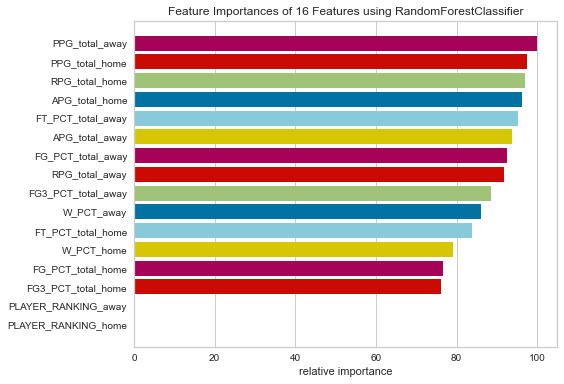

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       332
           1       0.65      0.58      0.61       295

    accuracy                           0.65       627
   macro avg       0.65      0.65      0.65       627
weighted avg       0.65      0.65      0.65       627



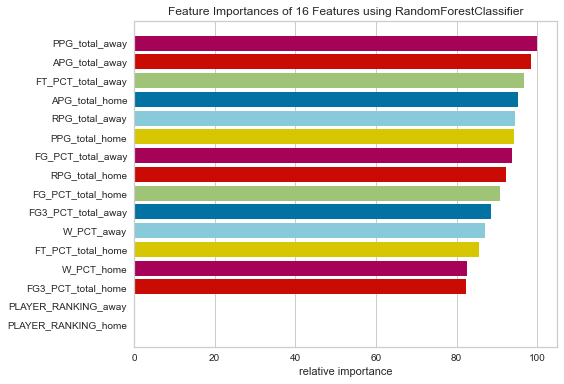

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       347
           1       0.64      0.60      0.62       280

    accuracy                           0.67       627
   macro avg       0.67      0.66      0.66       627
weighted avg       0.67      0.67      0.67       627



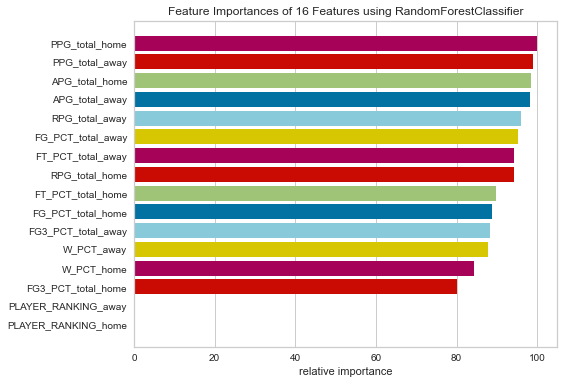

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       324
           1       0.65      0.51      0.58       302

    accuracy                           0.63       626
   macro avg       0.64      0.63      0.63       626
weighted avg       0.64      0.63      0.63       626



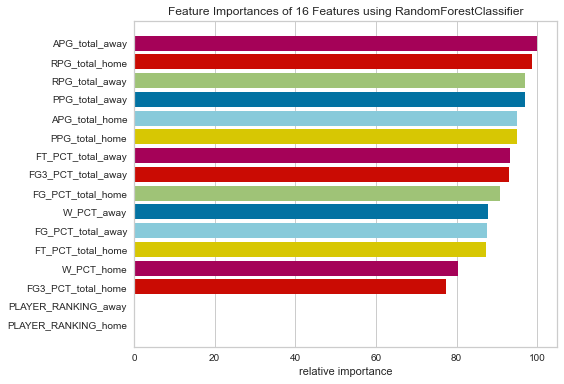

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.61      0.73      0.66       328
           1       0.62      0.50      0.55       298

    accuracy                           0.62       626
   macro avg       0.62      0.61      0.61       626
weighted avg       0.62      0.62      0.61       626



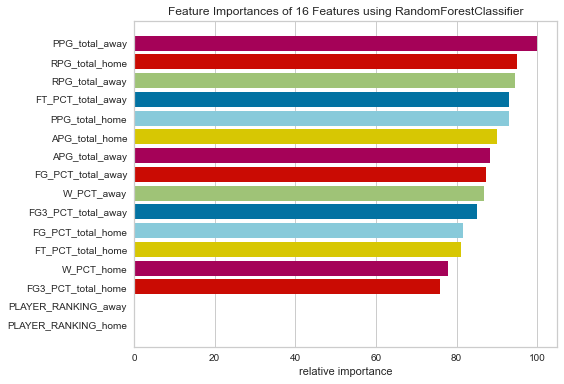

---------------------------------------------
Mean accuracy: 0.646584603390556
Max accuracy: 0.6698564593301436
Min accuracy: 0.6299840510366826
i=15
FT:

Best Random Forest accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       309
           1       0.66      0.66      0.66       328

    accuracy                           0.65       637
   macro avg       0.65      0.65      0.65       637
weighted avg       0.65      0.65      0.65       637



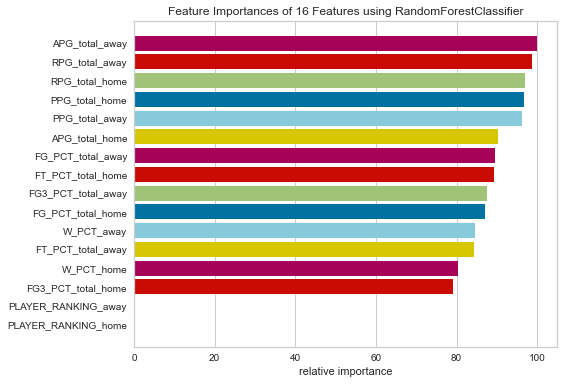

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       297
           1       0.69      0.67      0.68       340

    accuracy                           0.66       637
   macro avg       0.66      0.66      0.66       637
weighted avg       0.66      0.66      0.66       637



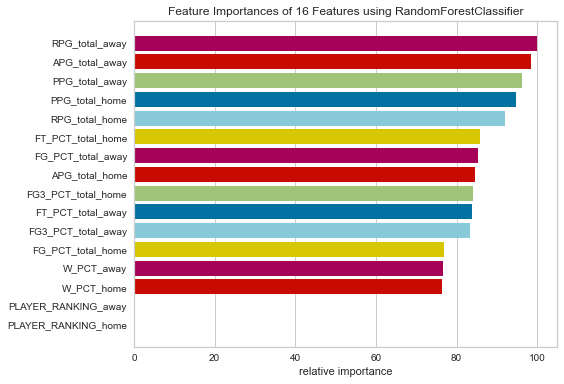

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       329
           1       0.60      0.71      0.65       308

    accuracy                           0.63       637
   macro avg       0.64      0.64      0.63       637
weighted avg       0.64      0.63      0.63       637



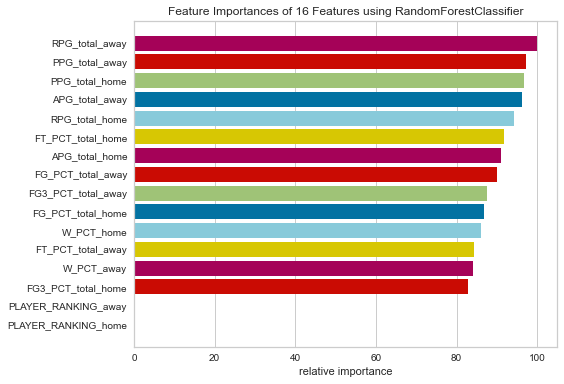

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       299
           1       0.68      0.62      0.65       337

    accuracy                           0.64       636
   macro avg       0.64      0.64      0.64       636
weighted avg       0.65      0.64      0.64       636



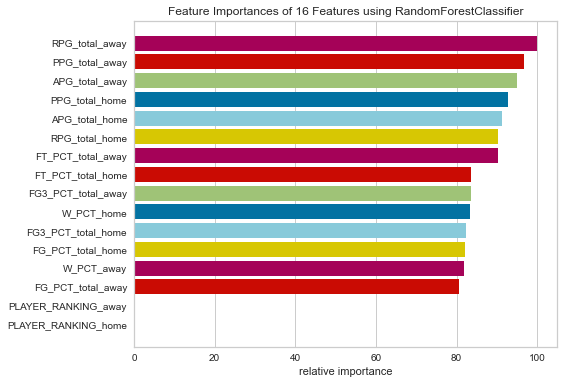

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_features': 12, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       313
           1       0.62      0.64      0.63       323

    accuracy                           0.62       636
   macro avg       0.62      0.62      0.62       636
weighted avg       0.62      0.62      0.62       636



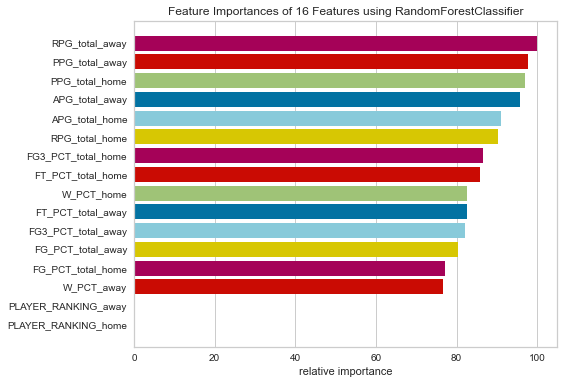

---------------------------------------------
Mean accuracy: 0.6462492471589507
Max accuracy: 0.6624803767660911
Min accuracy: 0.6326530612244898
i=20
AST:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       565
           1       0.71      0.42      0.53       397

    accuracy                           0.69       962
   macro avg       0.70      0.65      0.65       962
weighted avg       0.70      0.69      0.67       962



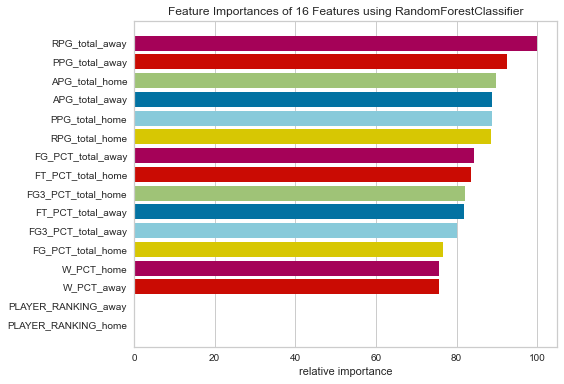

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       561
           1       0.67      0.43      0.53       401

    accuracy                           0.67       962
   macro avg       0.67      0.64      0.64       962
weighted avg       0.67      0.67      0.66       962



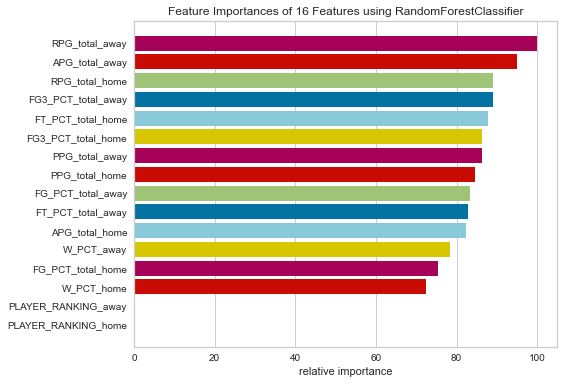

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       552
           1       0.71      0.41      0.52       409

    accuracy                           0.68       961
   macro avg       0.69      0.64      0.64       961
weighted avg       0.68      0.68      0.65       961



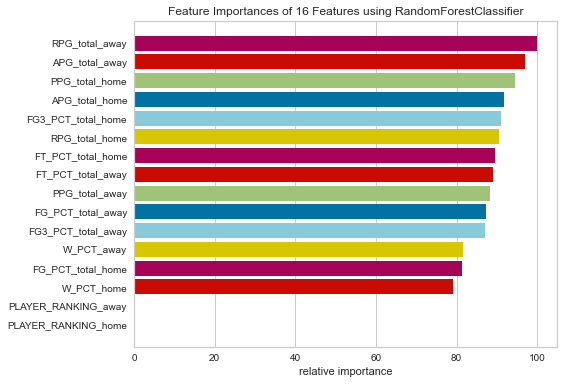

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       585
           1       0.69      0.38      0.49       376

    accuracy                           0.69       961
   macro avg       0.69      0.64      0.63       961
weighted avg       0.69      0.69      0.67       961



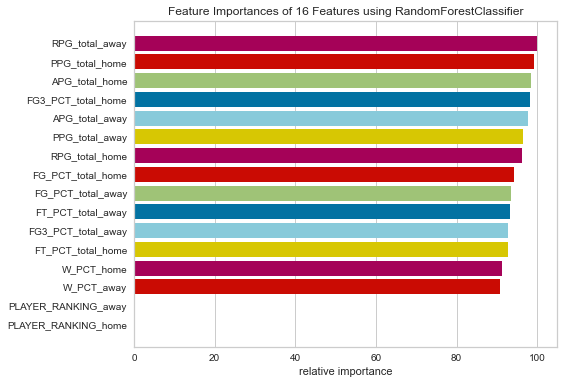

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.88      0.76       544
           1       0.73      0.45      0.56       417

    accuracy                           0.69       961
   macro avg       0.70      0.66      0.66       961
weighted avg       0.70      0.69      0.67       961



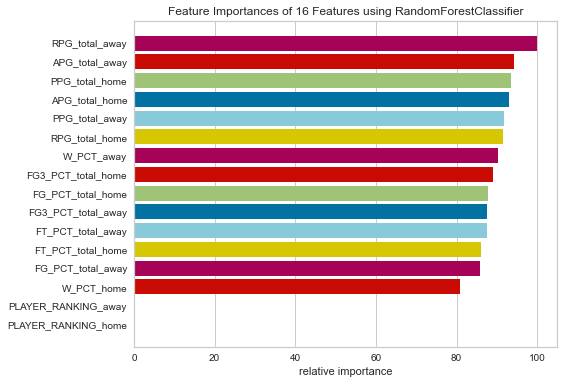

---------------------------------------------
Mean accuracy: 0.6827872257112632
Max accuracy: 0.6923076923076923
Min accuracy: 0.6735966735966736
i=25
REB:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       482
           1       0.65      0.44      0.52       352

    accuracy                           0.66       834
   macro avg       0.66      0.63      0.63       834
weighted avg       0.66      0.66      0.65       834



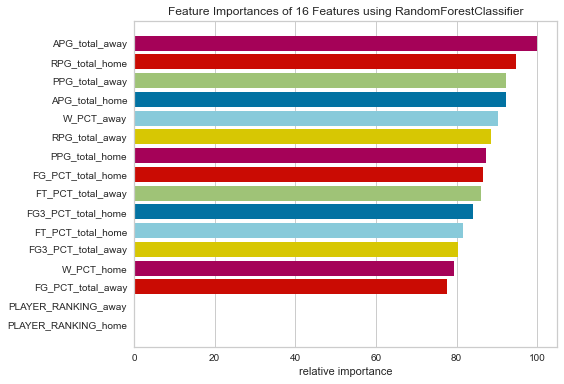

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       472
           1       0.65      0.42      0.51       362

    accuracy                           0.65       834
   macro avg       0.65      0.62      0.62       834
weighted avg       0.65      0.65      0.63       834



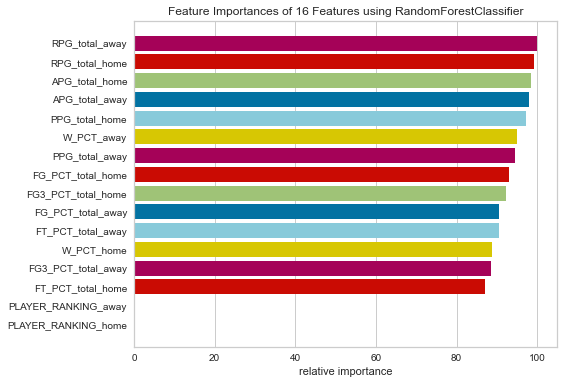

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       473
           1       0.69      0.49      0.57       361

    accuracy                           0.69       834
   macro avg       0.69      0.66      0.66       834
weighted avg       0.69      0.69      0.67       834



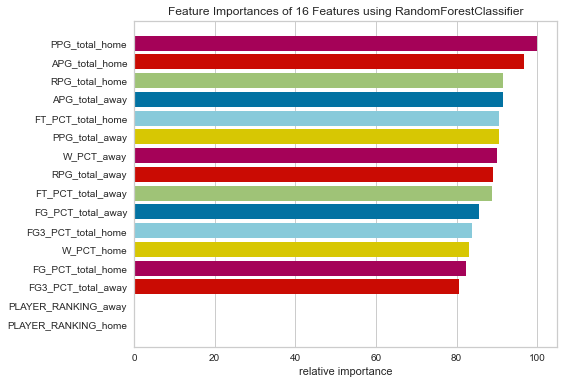

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       509
           1       0.60      0.48      0.53       325

    accuracy                           0.67       834
   macro avg       0.65      0.64      0.64       834
weighted avg       0.66      0.67      0.66       834



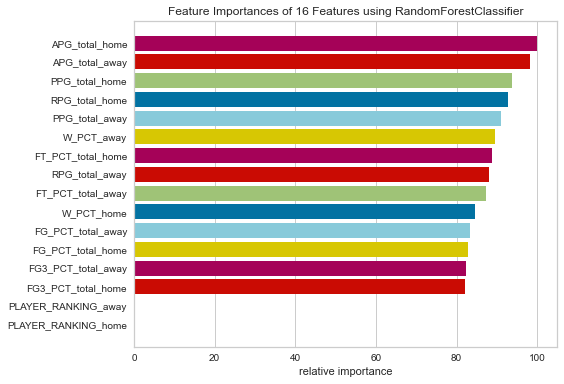

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       458
           1       0.73      0.50      0.59       375

    accuracy                           0.69       833
   macro avg       0.70      0.67      0.67       833
weighted avg       0.70      0.69      0.68       833



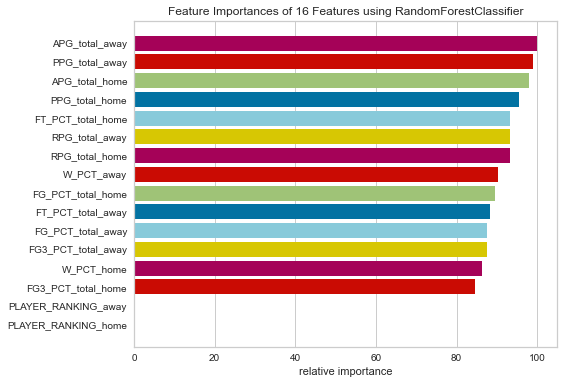

---------------------------------------------
Mean accuracy: 0.6684652278177456
Max accuracy: 0.6858513189448441
Min accuracy: 0.6510791366906474


In [34]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.95      0.80       880
           1       0.74      0.26      0.38       494

    accuracy                           0.70      1374
   macro avg       0.72      0.60      0.59      1374
weighted avg       0.71      0.70      0.65      1374



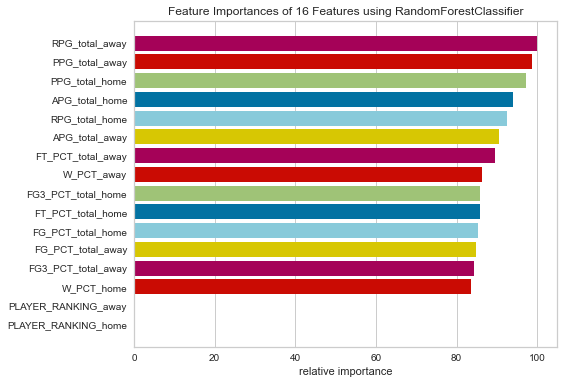

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       856
           1       0.73      0.32      0.45       518

    accuracy                           0.70      1374
   macro avg       0.71      0.62      0.62      1374
weighted avg       0.71      0.70      0.66      1374



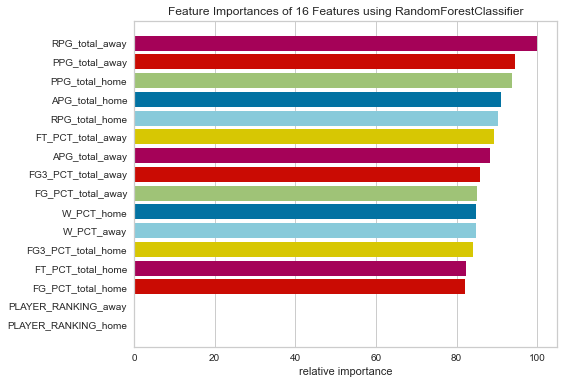

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       862
           1       0.75      0.35      0.48       512

    accuracy                           0.71      1374
   macro avg       0.73      0.64      0.64      1374
weighted avg       0.72      0.71      0.68      1374



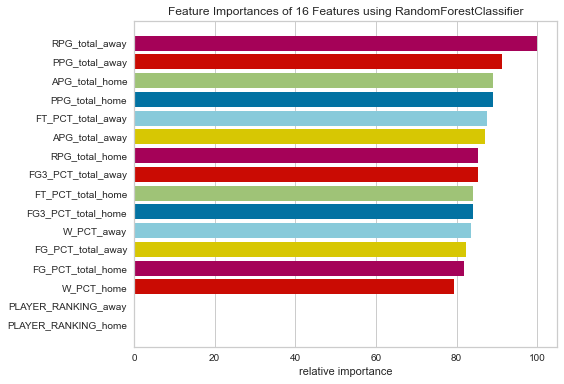

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.72
              precision    recall  f1-score   support

           0       0.72      0.92      0.80       867
           1       0.72      0.38      0.49       506

    accuracy                           0.72      1373
   macro avg       0.72      0.65      0.65      1373
weighted avg       0.72      0.72      0.69      1373



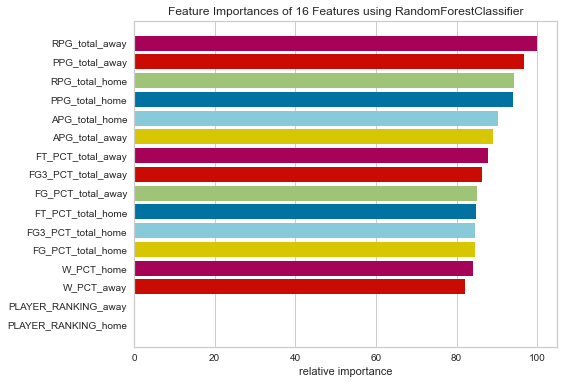

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       873
           1       0.76      0.33      0.46       500

    accuracy                           0.72      1373
   macro avg       0.73      0.64      0.64      1373
weighted avg       0.73      0.72      0.68      1373



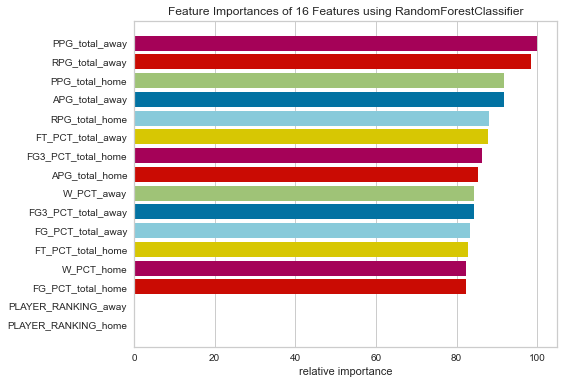

---------------------------------------------
Mean accuracy: 0.7079178818787364
Max accuracy: 0.7166788055353241
Min accuracy: 0.6986899563318777
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       589
           1       0.76      0.37      0.50       408

    accuracy                           0.69       997
   macro avg       0.72      0.64      0.64       997
weighted avg       0.71      0.69      0.66       997



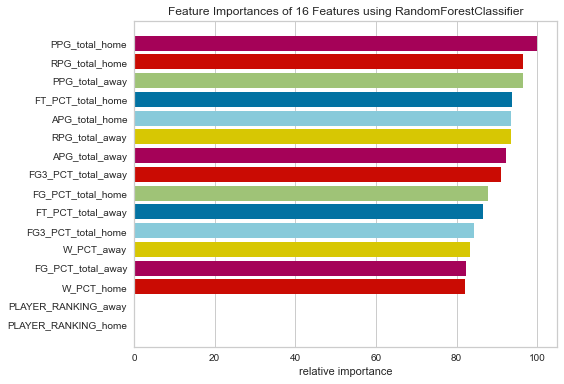

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       629
           1       0.65      0.37      0.47       368

    accuracy                           0.70       997
   macro avg       0.68      0.63      0.63       997
weighted avg       0.69      0.70      0.67       997



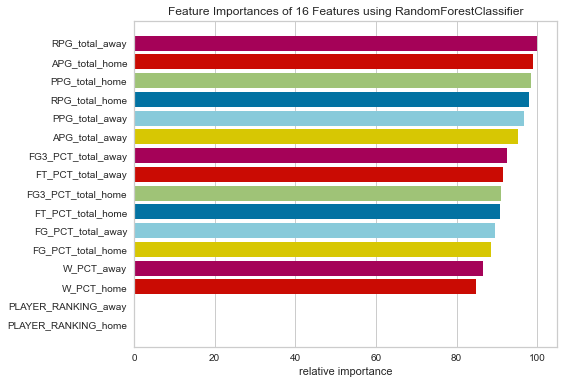

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       579
           1       0.73      0.30      0.43       418

    accuracy                           0.66       997
   macro avg       0.69      0.61      0.59       997
weighted avg       0.68      0.66      0.62       997



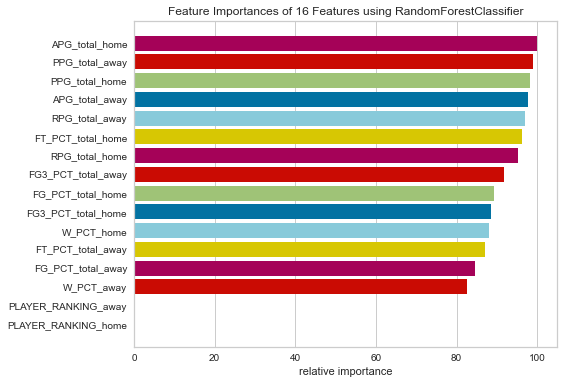

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       631
           1       0.66      0.37      0.47       366

    accuracy                           0.70       997
   macro avg       0.68      0.63      0.63       997
weighted avg       0.69      0.70      0.67       997



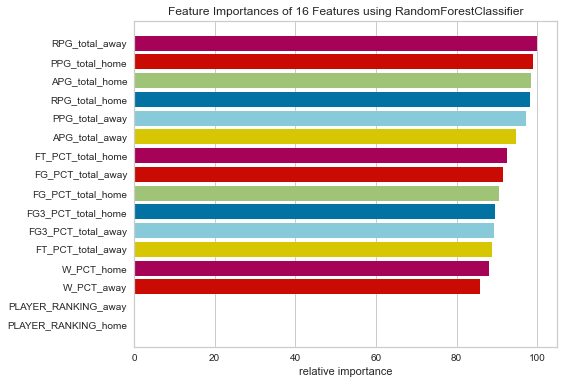

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       579
           1       0.76      0.35      0.48       417

    accuracy                           0.68       996
   macro avg       0.71      0.63      0.62       996
weighted avg       0.70      0.68      0.65       996



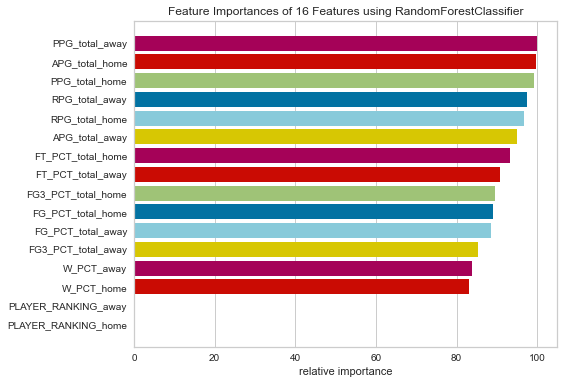

---------------------------------------------
Mean accuracy: 0.687061183550652
Max accuracy: 0.6980942828485457
Min accuracy: 0.6609829488465396
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       314
           1       0.68      0.55      0.61       313

    accuracy                           0.64       627
   macro avg       0.65      0.64      0.64       627
weighted avg       0.65      0.64      0.64       627



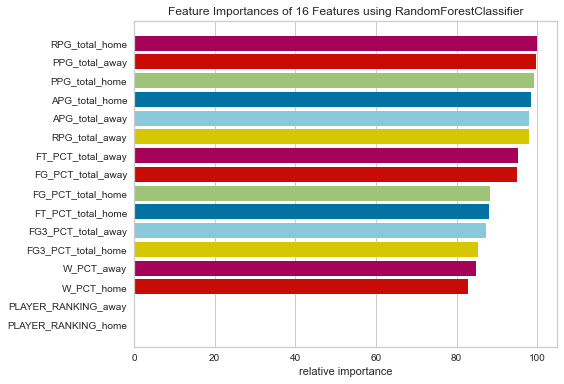

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       332
           1       0.65      0.58      0.61       295

    accuracy                           0.65       627
   macro avg       0.65      0.65      0.65       627
weighted avg       0.65      0.65      0.65       627



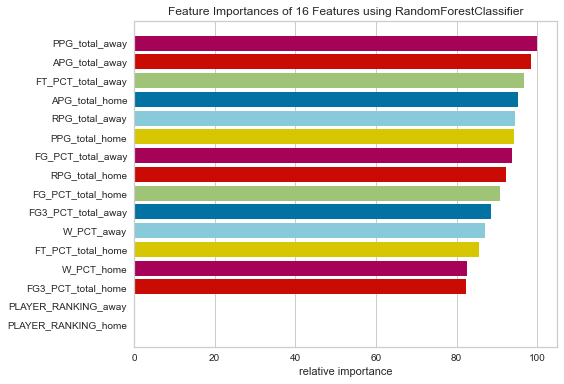

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       347
           1       0.65      0.64      0.64       280

    accuracy                           0.68       627
   macro avg       0.68      0.68      0.68       627
weighted avg       0.68      0.68      0.68       627



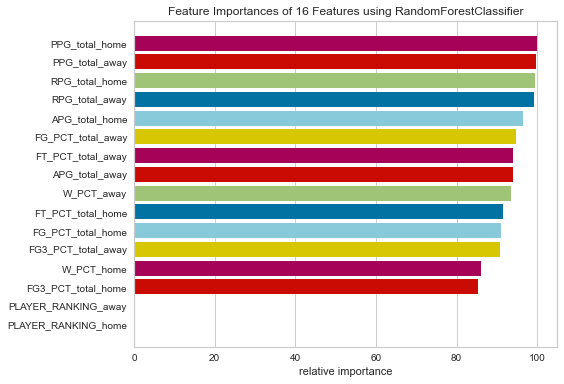

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.77      0.69       324
           1       0.68      0.52      0.59       302

    accuracy                           0.65       626
   macro avg       0.66      0.65      0.64       626
weighted avg       0.66      0.65      0.64       626



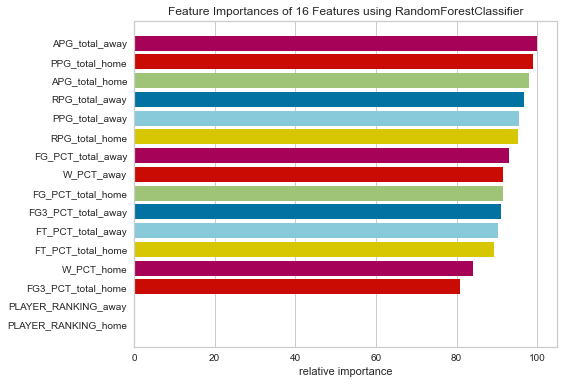

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       328
           1       0.65      0.50      0.56       298

    accuracy                           0.63       626
   macro avg       0.63      0.62      0.62       626
weighted avg       0.63      0.63      0.62       626



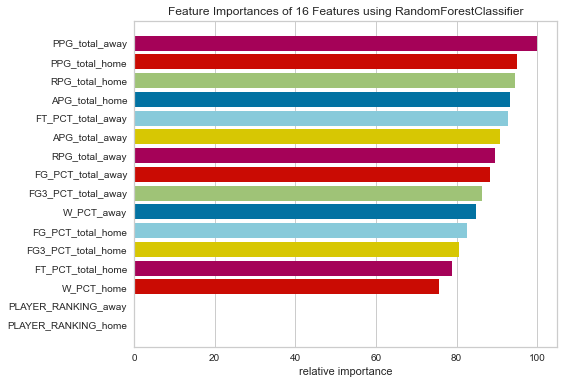

---------------------------------------------
Mean accuracy: 0.6573565230240864
Max accuracy: 0.682615629984051
Min accuracy: 0.6443381180223285
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.64
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       309
           1       0.64      0.67      0.66       328

    accuracy                           0.64       637
   macro avg       0.64      0.64      0.64       637
weighted avg       0.64      0.64      0.64       637



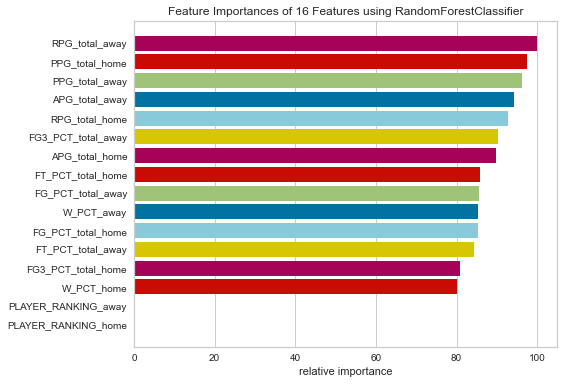

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.65
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       297
           1       0.67      0.67      0.67       340

    accuracy                           0.65       637
   macro avg       0.64      0.64      0.64       637
weighted avg       0.65      0.65      0.65       637



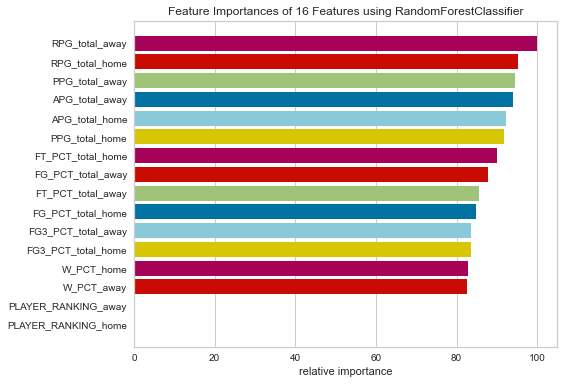

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       329
           1       0.60      0.71      0.65       308

    accuracy                           0.63       637
   macro avg       0.64      0.64      0.63       637
weighted avg       0.64      0.63      0.63       637



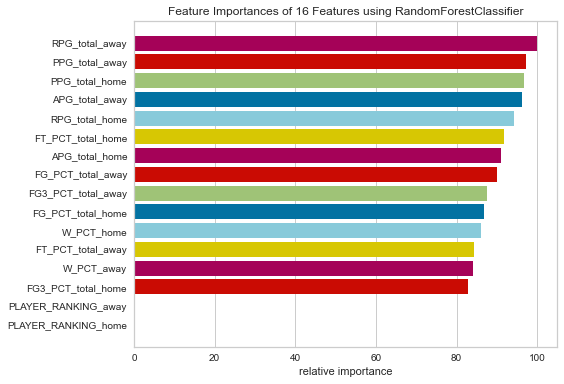

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.61
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       299
           1       0.64      0.58      0.61       337

    accuracy                           0.61       636
   macro avg       0.61      0.61      0.61       636
weighted avg       0.61      0.61      0.61       636



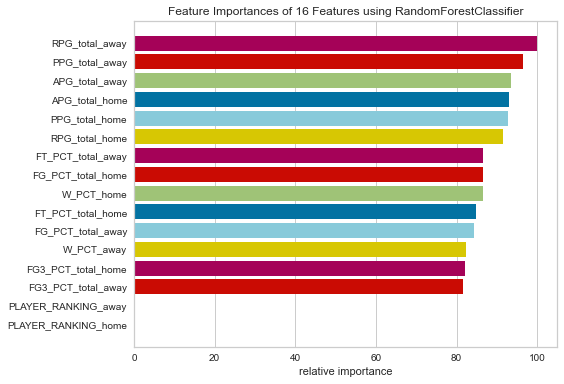

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       313
           1       0.63      0.67      0.65       323

    accuracy                           0.63       636
   macro avg       0.63      0.63      0.63       636
weighted avg       0.63      0.63      0.63       636



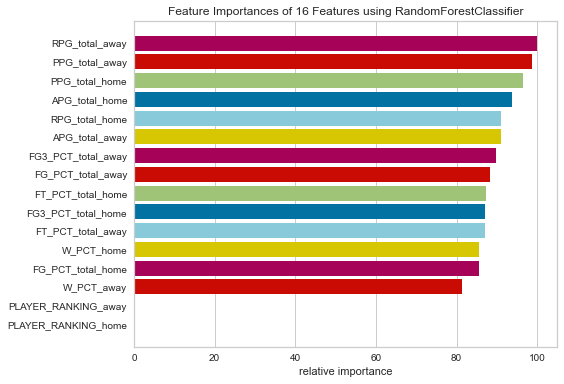

---------------------------------------------
Mean accuracy: 0.6309289318049426
Max accuracy: 0.6452119309262166
Min accuracy: 0.6069182389937107
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.89      0.77       565
           1       0.73      0.42      0.54       397

    accuracy                           0.70       962
   macro avg       0.71      0.66      0.65       962
weighted avg       0.70      0.70      0.68       962



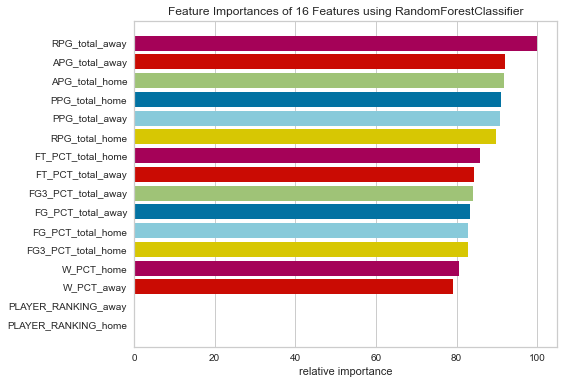

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       561
           1       0.70      0.42      0.53       401

    accuracy                           0.69       962
   macro avg       0.69      0.65      0.65       962
weighted avg       0.69      0.69      0.67       962



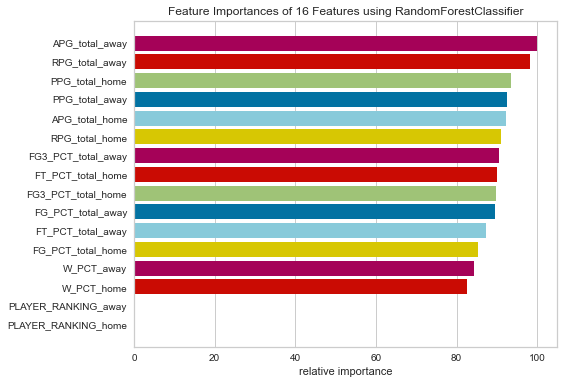

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       552
           1       0.72      0.41      0.53       409

    accuracy                           0.68       961
   macro avg       0.70      0.65      0.64       961
weighted avg       0.69      0.68      0.66       961



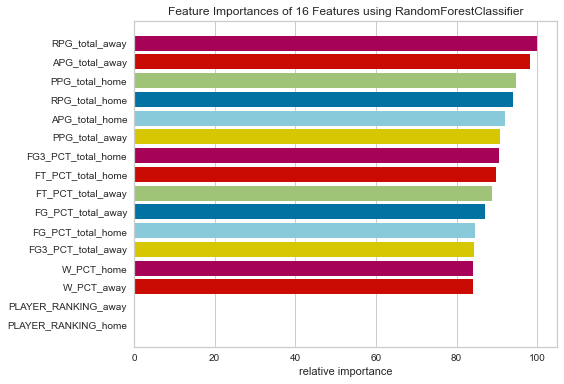

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       585
           1       0.63      0.39      0.48       376

    accuracy                           0.67       961
   macro avg       0.66      0.62      0.62       961
weighted avg       0.66      0.67      0.65       961



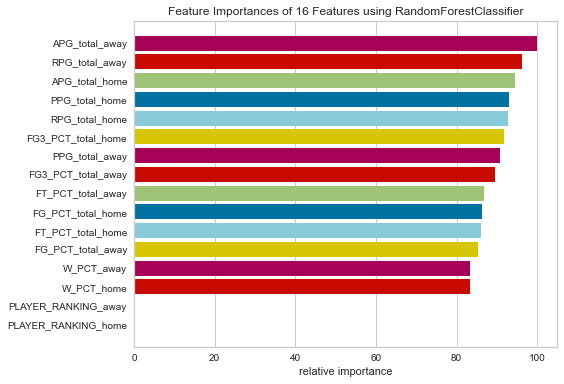

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       544
           1       0.73      0.43      0.54       417

    accuracy                           0.68       961
   macro avg       0.70      0.65      0.65       961
weighted avg       0.69      0.68      0.66       961



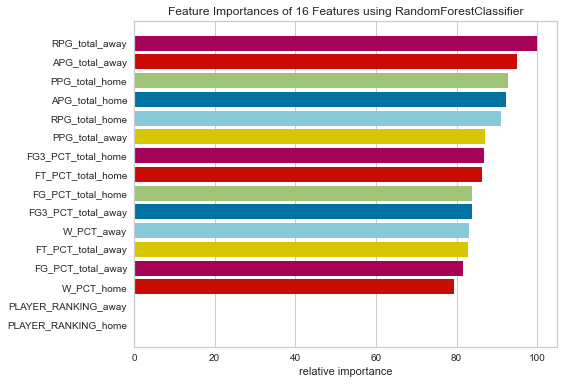

---------------------------------------------
Mean accuracy: 0.6835636064304119
Max accuracy: 0.6964656964656964
Min accuracy: 0.6701352757544224
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.82      0.74       482
           1       0.64      0.43      0.51       352

    accuracy                           0.66       834
   macro avg       0.65      0.63      0.62       834
weighted avg       0.65      0.66      0.64       834



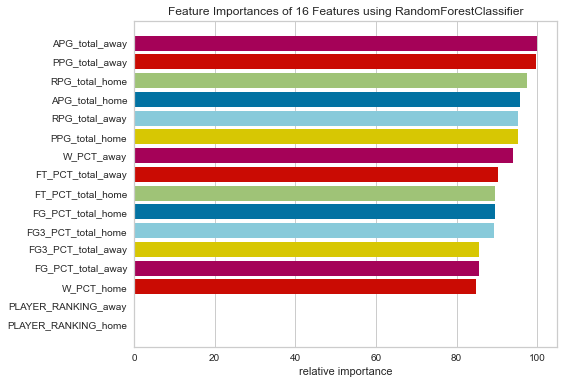

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       472
           1       0.71      0.42      0.52       362

    accuracy                           0.67       834
   macro avg       0.68      0.64      0.64       834
weighted avg       0.68      0.67      0.65       834



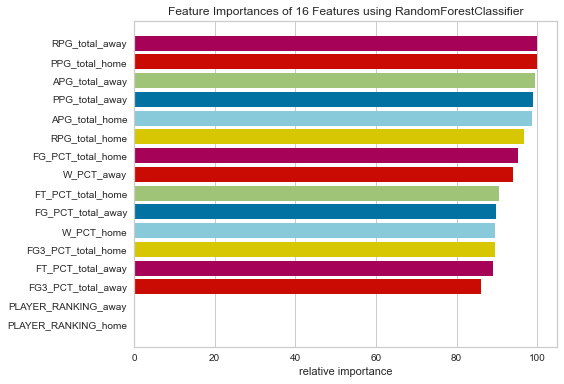

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       473
           1       0.70      0.43      0.53       361

    accuracy                           0.67       834
   macro avg       0.68      0.64      0.64       834
weighted avg       0.68      0.67      0.66       834



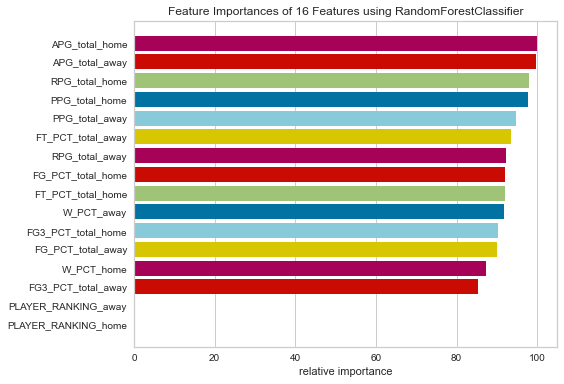

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       509
           1       0.60      0.42      0.49       325

    accuracy                           0.66       834
   macro avg       0.64      0.62      0.62       834
weighted avg       0.65      0.66      0.65       834



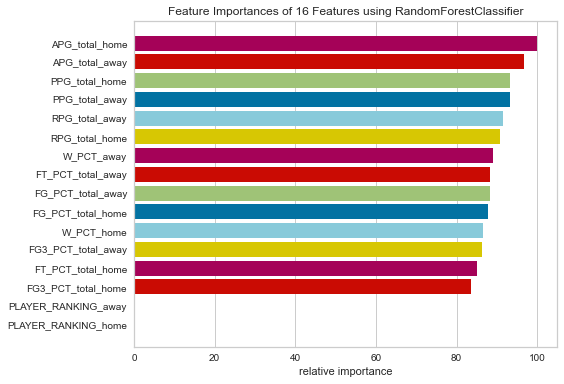

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       458
           1       0.72      0.45      0.55       375

    accuracy                           0.67       833
   macro avg       0.69      0.65      0.65       833
weighted avg       0.68      0.67      0.66       833



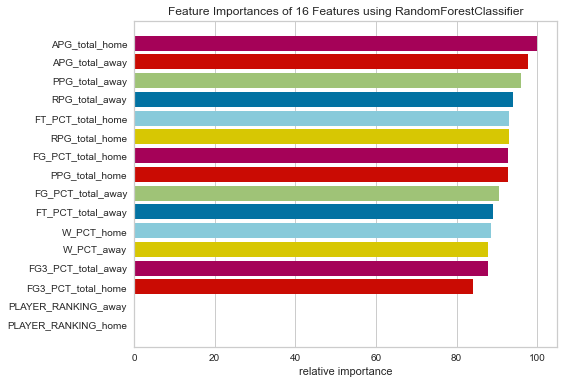

---------------------------------------------
Mean accuracy: 0.6663669064748202
Max accuracy: 0.6726618705035972
Min accuracy: 0.657074340527578


In [35]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})